### Import Libraries

In [112]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm   
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report

import statsmodels.api as sm

import seaborn as sns

### Dataset to Dataframe

In [2]:
datasetAccident = pd.read_csv("NHAIAccidentData.csv")

In [3]:
datasetAccident.head()

Date TimeOfAcc     AccLocation  NatureAccident  \
0   9/6/2015  09:00 AM     Ch. 69+5006               2   
1   9/5/2014  07:18 AM          72+500               7   
2  9/10/2014  08:50 AM      20+250 LHS               4   
3   8/9/2015  05:00 AM             NaN               1   
4   8/4/2015  08:23 AM  126.800 KM RHS               2   

  ClassificationOfAccident Causes  RoadFeature  RoadCondition  \
0                        2      2            2              1   
1                        1      2            2              3   
2                        -      3            3              1   
3                        2      2            1              3   
4                        2      2            4              4   

   IntersectionTypeControl  WeatherCondition  \
0                        9                 1   
1                        9                 1   
2                        9                 1   
3                        9                 1   
4                        9                 1   

                          VehicleResponsible  Fatal  Grevious  Minor  Injured  \
0                 One Diesel Truck collapsed      0         2      1        0   
1                            Lorry & Scorpio      2         0      0        0   
2  LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477)      0         0      0        0   
3                                Lorry Truck      0         1      1        0   
4                                        Car      0         2      1        1   

   NumAnimalsKilled HelpProvidedByAmbulancePatrol  \
0                 0                Petrol Vehicle   
1                 0                     Ambulance   
2                 0                Petrol Vehicle   
3                 0                Petrol Vehicle   
4                 0                Petrol Vehicle   

                                      Remarks  
0                                         NaN  
1                                         NaN  
2  NO PROPERTY DAMAGES. INFORMED KEY PERSONS.  
3                                         NaN  
4              A car upside due to over speed

<font color = blue, size=150px>

**Q1**
</font>

## Data Pre-processing

### Separating out Date variable into y, m and d

In [4]:
dateAccident = pd.to_datetime(datasetAccident['Date'])
datasetAccident['YAccident'] = dateAccident.dt.year
datasetAccident['MAccident'] = dateAccident.dt.month
datasetAccident['DAccident'] = dateAccident.dt.day
datasetAccident = datasetAccident.drop(['Date'],axis=1)

In [5]:
datasetAccident.head()

TimeOfAcc     AccLocation  NatureAccident ClassificationOfAccident Causes  \
0  09:00 AM     Ch. 69+5006               2                        2      2   
1  07:18 AM          72+500               7                        1      2   
2  08:50 AM      20+250 LHS               4                        -      3   
3  05:00 AM             NaN               1                        2      2   
4  08:23 AM  126.800 KM RHS               2                        2      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
2            3              1                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   

                          VehicleResponsible  Fatal  Grevious  Minor  Injured  \
0                 One Diesel Truck collapsed      0         2      1        0   
1                            Lorry & Scorpio      2         0      0        0   
2  LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477)      0         0      0        0   
3                                Lorry Truck      0         1      1        0   
4                                        Car      0         2      1        1   

   NumAnimalsKilled HelpProvidedByAmbulancePatrol  \
0                 0                Petrol Vehicle   
1                 0                     Ambulance   
2                 0                Petrol Vehicle   
3                 0                Petrol Vehicle   
4                 0                Petrol Vehicle   

                                      Remarks  YAccident  MAccident  DAccident  
0                                         NaN       2015          9          6  
1                                         NaN       2014          9          5  
2  NO PROPERTY DAMAGES. INFORMED KEY PERSONS.       2014          9         10  
3                                         NaN       2015          8          9  
4              A car upside due to over speed       2015          8          4

### Separating out categories of HelpProvidedBy into features

In [6]:
# get_dummies converts categories into indicator variables or features
new_HelpProvidedBy = pd.get_dummies(datasetAccident['HelpProvidedByAmbulancePatrol'],prefix='HelpProvidedBy')
new_HelpProvidedBy.head()

HelpProvidedBy_Ambulance  HelpProvidedBy_Ambulance/Petrol Vehicle  \
0                         0                                        0   
1                         1                                        0   
2                         0                                        0   
3                         0                                        0   
4                         0                                        0   

   HelpProvidedBy_Petrol Vehicle  
0                              1  
1                              0  
2                              1  
3                              1  
4                              1

In [7]:
datasetAccident['HelpProvidedBy_Ambulance'] = new_HelpProvidedBy['HelpProvidedBy_Ambulance']
datasetAccident['HelpProvidedBy_Ambulance/Petrol Vehicle'] = new_HelpProvidedBy['HelpProvidedBy_Ambulance/Petrol Vehicle']
datasetAccident['HelpProvidedBy_Petrol Vehicle'] = new_HelpProvidedBy['HelpProvidedBy_Petrol Vehicle']

datasetAccident = datasetAccident.drop(['HelpProvidedByAmbulancePatrol'],axis=1)

datasetAccident.head()

TimeOfAcc     AccLocation  NatureAccident ClassificationOfAccident Causes  \
0  09:00 AM     Ch. 69+5006               2                        2      2   
1  07:18 AM          72+500               7                        1      2   
2  08:50 AM      20+250 LHS               4                        -      3   
3  05:00 AM             NaN               1                        2      2   
4  08:23 AM  126.800 KM RHS               2                        2      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
2            3              1                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   

                          VehicleResponsible  ...  Minor  Injured  \
0                 One Diesel Truck collapsed  ...      1        0   
1                            Lorry & Scorpio  ...      0        0   
2  LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477)  ...      0        0   
3                                Lorry Truck  ...      1        0   
4                                        Car  ...      1        1   

   NumAnimalsKilled                                     Remarks  YAccident  \
0                 0                                         NaN       2015   
1                 0                                         NaN       2014   
2                 0  NO PROPERTY DAMAGES. INFORMED KEY PERSONS.       2014   
3                 0                                         NaN       2015   
4                 0              A car upside due to over speed       2015   

  MAccident  DAccident  HelpProvidedBy_Ambulance  \
0         9          6                         0   
1         9          5                         1   
2         9         10                         0   
3         8          9                         0   
4         8          4                         0   

   HelpProvidedBy_Ambulance/Petrol Vehicle  HelpProvidedBy_Petrol Vehicle  
0                                        0                              1  
1                                        0                              0  
2                                        0                              1  
3                                        0                              1  
4                                        0                              1  

[5 rows x 22 columns]

### Separating Time feature out

In [8]:
tempTime = datasetAccident["TimeOfAcc"].str.split(" ", n = 1, expand = True)
tempTime.head()

0   1
0  09:00  AM
1  07:18  AM
2  08:50  AM
3  05:00  AM
4  08:23  AM

In [9]:
datasetAccident['TimeOfAccNum'] = tempTime[0]
datasetAccident['TimeOfAccAmPm'] = tempTime[1]
datasetAccident = datasetAccident.drop(['TimeOfAcc'],axis=1)
datasetAccident.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  \
0     Ch. 69+5006               2                        2      2   
1          72+500               7                        1      2   
2      20+250 LHS               4                        -      3   
3             NaN               1                        2      2   
4  126.800 KM RHS               2                        2      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
2            3              1                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   

                          VehicleResponsible  Fatal  ...  NumAnimalsKilled  \
0                 One Diesel Truck collapsed      0  ...                 0   
1                            Lorry & Scorpio      2  ...                 0   
2  LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477)      0  ...                 0   
3                                Lorry Truck      0  ...                 0   
4                                        Car      0  ...                 0   

                                      Remarks  YAccident  MAccident DAccident  \
0                                         NaN       2015          9         6   
1                                         NaN       2014          9         5   
2  NO PROPERTY DAMAGES. INFORMED KEY PERSONS.       2014          9        10   
3                                         NaN       2015          8         9   
4              A car upside due to over speed       2015          8         4   

   HelpProvidedBy_Ambulance  HelpProvidedBy_Ambulance/Petrol Vehicle  \
0                         0                                        0   
1                         1                                        0   
2                         0                                        0   
3                         0                                        0   
4                         0                                        0   

   HelpProvidedBy_Petrol Vehicle  TimeOfAccNum  TimeOfAccAmPm  
0                              1         09:00             AM  
1                              0         07:18             AM  
2                              1         08:50             AM  
3                              1         05:00             AM  
4                              1         08:23             AM  

[5 rows x 23 columns]

### SEPARATING OUT HOURS AND MINUTES

In [10]:
hourMinute = datasetAccident['TimeOfAccNum'].str.split(":", n=1, expand=True)
datasetAccident['TimeOfAccHour'] = hourMinute[0]
datasetAccident=datasetAccident.drop(['TimeOfAccNum'],axis=1)

In [11]:
datasetAccident.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  \
0     Ch. 69+5006               2                        2      2   
1          72+500               7                        1      2   
2      20+250 LHS               4                        -      3   
3             NaN               1                        2      2   
4  126.800 KM RHS               2                        2      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
2            3              1                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   

                          VehicleResponsible  Fatal  ...  NumAnimalsKilled  \
0                 One Diesel Truck collapsed      0  ...                 0   
1                            Lorry & Scorpio      2  ...                 0   
2  LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477)      0  ...                 0   
3                                Lorry Truck      0  ...                 0   
4                                        Car      0  ...                 0   

                                      Remarks  YAccident  MAccident DAccident  \
0                                         NaN       2015          9         6   
1                                         NaN       2014          9         5   
2  NO PROPERTY DAMAGES. INFORMED KEY PERSONS.       2014          9        10   
3                                         NaN       2015          8         9   
4              A car upside due to over speed       2015          8         4   

   HelpProvidedBy_Ambulance  HelpProvidedBy_Ambulance/Petrol Vehicle  \
0                         0                                        0   
1                         1                                        0   
2                         0                                        0   
3                         0                                        0   
4                         0                                        0   

   HelpProvidedBy_Petrol Vehicle  TimeOfAccAmPm  TimeOfAccHour  
0                              1             AM             09  
1                              0             AM             07  
2                              1             AM             08  
3                              1             AM             05  
4                              1             AM             08  

[5 rows x 23 columns]

In [12]:
timeAmPm = pd.get_dummies(datasetAccident['TimeOfAccAmPm'])
datasetAccident['TimeOfAccAm']=timeAmPm['AM']
datasetAccident['TimeOfAccPm']=timeAmPm['PM']
datasetAccident=datasetAccident.drop(['TimeOfAccAmPm'],axis=1)
datasetAccident.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  \
0     Ch. 69+5006               2                        2      2   
1          72+500               7                        1      2   
2      20+250 LHS               4                        -      3   
3             NaN               1                        2      2   
4  126.800 KM RHS               2                        2      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
2            3              1                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   

                          VehicleResponsible  Fatal  ...  \
0                 One Diesel Truck collapsed      0  ...   
1                            Lorry & Scorpio      2  ...   
2  LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477)      0  ...   
3                                Lorry Truck      0  ...   
4                                        Car      0  ...   

                                      Remarks  YAccident  MAccident  \
0                                         NaN       2015          9   
1                                         NaN       2014          9   
2  NO PROPERTY DAMAGES. INFORMED KEY PERSONS.       2014          9   
3                                         NaN       2015          8   
4              A car upside due to over speed       2015          8   

   DAccident HelpProvidedBy_Ambulance  \
0          6                        0   
1          5                        1   
2         10                        0   
3          9                        0   
4          4                        0   

   HelpProvidedBy_Ambulance/Petrol Vehicle  HelpProvidedBy_Petrol Vehicle  \
0                                        0                              1   
1                                        0                              0   
2                                        0                              1   
3                                        0                              1   
4                                        0                              1   

   TimeOfAccHour  TimeOfAccAm  TimeOfAccPm  
0             09            1            0  
1             07            1            0  
2             08            1            0  
3             05            1            0  
4             08            1            0  

[5 rows x 24 columns]

### Data Pre-processing Vehicle Responsible

#### lorry/truck/bus/tipper = 0
#### car/lcv/matador = 1
#### bike/two wheeler/motor cycle = 2
#### unknown = 3
#### '' = 4

In [13]:
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('lorry',case=False), 'newVehicleResponsible']='0'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('truck',case=False), 'newVehicleResponsible']='0'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('car',case=False), 'newVehicleResponsible']='1'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('bus',case=False), 'newVehicleResponsible']='0'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('motor cycle',case=False), 'newVehicleResponsible']='2'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('two wheeler',case=False), 'newVehicleResponsible']='2'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('bike',case=False), 'newVehicleResponsible']='2'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('unknown',case=False), 'newVehicleResponsible']='3'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('lcv',case=False), 'newVehicleResponsible']='1'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('tipper',case=False), 'newVehicleResponsible']='0'
datasetAccident.loc[datasetAccident['VehicleResponsible'].str.contains('matador',case=False), 'newVehicleResponsible']='1'
datasetAccident.loc[datasetAccident['VehicleResponsible'] =='', 'newVehicleResponsible']='4'

datasetAccident.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  \
0     Ch. 69+5006               2                        2      2   
1          72+500               7                        1      2   
2      20+250 LHS               4                        -      3   
3             NaN               1                        2      2   
4  126.800 KM RHS               2                        2      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
2            3              1                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   

                          VehicleResponsible  Fatal  ...  YAccident  \
0                 One Diesel Truck collapsed      0  ...       2015   
1                            Lorry & Scorpio      2  ...       2014   
2  LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477)      0  ...       2014   
3                                Lorry Truck      0  ...       2015   
4                                        Car      0  ...       2015   

   MAccident  DAccident  HelpProvidedBy_Ambulance  \
0          9          6                         0   
1          9          5                         1   
2          9         10                         0   
3          8          9                         0   
4          8          4                         0   

  HelpProvidedBy_Ambulance/Petrol Vehicle  HelpProvidedBy_Petrol Vehicle  \
0                                       0                              1   
1                                       0                              0   
2                                       0                              1   
3                                       0                              1   
4                                       0                              1   

   TimeOfAccHour  TimeOfAccAm  TimeOfAccPm  newVehicleResponsible  
0             09            1            0                      0  
1             07            1            0                      0  
2             08            1            0                      1  
3             05            1            0                      0  
4             08            1            0                      1  

[5 rows x 25 columns]

In [14]:
tempVehiclesResponsible = pd.get_dummies(datasetAccident['newVehicleResponsible'],prefix='VehicleResponsible')
tempVehiclesResponsible.head()

VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
0                     1                     0                     0   
1                     1                     0                     0   
2                     0                     1                     0   
3                     1                     0                     0   
4                     0                     1                     0   

   VehicleResponsible_3  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [15]:
datasetAccident['VehicleResponsible_0']=tempVehiclesResponsible['VehicleResponsible_0']
datasetAccident['VehicleResponsible_1']=tempVehiclesResponsible['VehicleResponsible_1']
datasetAccident['VehicleResponsible_2']=tempVehiclesResponsible['VehicleResponsible_2']
datasetAccident['VehicleResponsible_3']=tempVehiclesResponsible['VehicleResponsible_3']

datasetAccident=datasetAccident.drop(['VehicleResponsible'],axis=1)
datasetAccident=datasetAccident.drop(['newVehicleResponsible'],axis=1)
datasetAccident.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  \
0     Ch. 69+5006               2                        2      2   
1          72+500               7                        1      2   
2      20+250 LHS               4                        -      3   
3             NaN               1                        2      2   
4  126.800 KM RHS               2                        2      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
2            3              1                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   

   Fatal  Grevious  ...  HelpProvidedBy_Ambulance  \
0      0         2  ...                         0   
1      2         0  ...                         1   
2      0         0  ...                         0   
3      0         1  ...                         0   
4      0         2  ...                         0   

   HelpProvidedBy_Ambulance/Petrol Vehicle  HelpProvidedBy_Petrol Vehicle  \
0                                        0                              1   
1                                        0                              0   
2                                        0                              1   
3                                        0                              1   
4                                        0                              1   

  TimeOfAccHour  TimeOfAccAm  TimeOfAccPm  VehicleResponsible_0  \
0            09            1            0                     1   
1            07            1            0                     1   
2            08            1            0                     0   
3            05            1            0                     1   
4            08            1            0                     0   

   VehicleResponsible_1  VehicleResponsible_2  VehicleResponsible_3  
0                     0                     0                     0  
1                     0                     0                     0  
2                     1                     0                     0  
3                     0                     0                     0  
4                     1                     0                     0  

[5 rows x 27 columns]

### Removing unclassified data - ClassificationOfAccident

In [16]:
datasetAccident = datasetAccident.drop (datasetAccident[datasetAccident.ClassificationOfAccident=='-'].index)
datasetAccident.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  \
0     Ch. 69+5006               2                        2      2   
1          72+500               7                        1      2   
3             NaN               1                        2      2   
4  126.800 KM RHS               2                        2      2   
5  126.800 KM RHS               2                        3      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   
5            4              4                        9                 1   

   Fatal  Grevious  ...  HelpProvidedBy_Ambulance  \
0      0         2  ...                         0   
1      2         0  ...                         1   
3      0         1  ...                         0   
4      0         2  ...                         0   
5      0         2  ...                         0   

   HelpProvidedBy_Ambulance/Petrol Vehicle  HelpProvidedBy_Petrol Vehicle  \
0                                        0                              1   
1                                        0                              0   
3                                        0                              1   
4                                        0                              1   
5                                        0                              1   

  TimeOfAccHour  TimeOfAccAm  TimeOfAccPm  VehicleResponsible_0  \
0            09            1            0                     1   
1            07            1            0                     1   
3            05            1            0                     1   
4            08            1            0                     0   
5            08            1            0                     0   

   VehicleResponsible_1  VehicleResponsible_2  VehicleResponsible_3  
0                     0                     0                     0  
1                     0                     0                     0  
3                     0                     0                     0  
4                     1                     0                     0  
5                     1                     0                     0  

[5 rows x 27 columns]

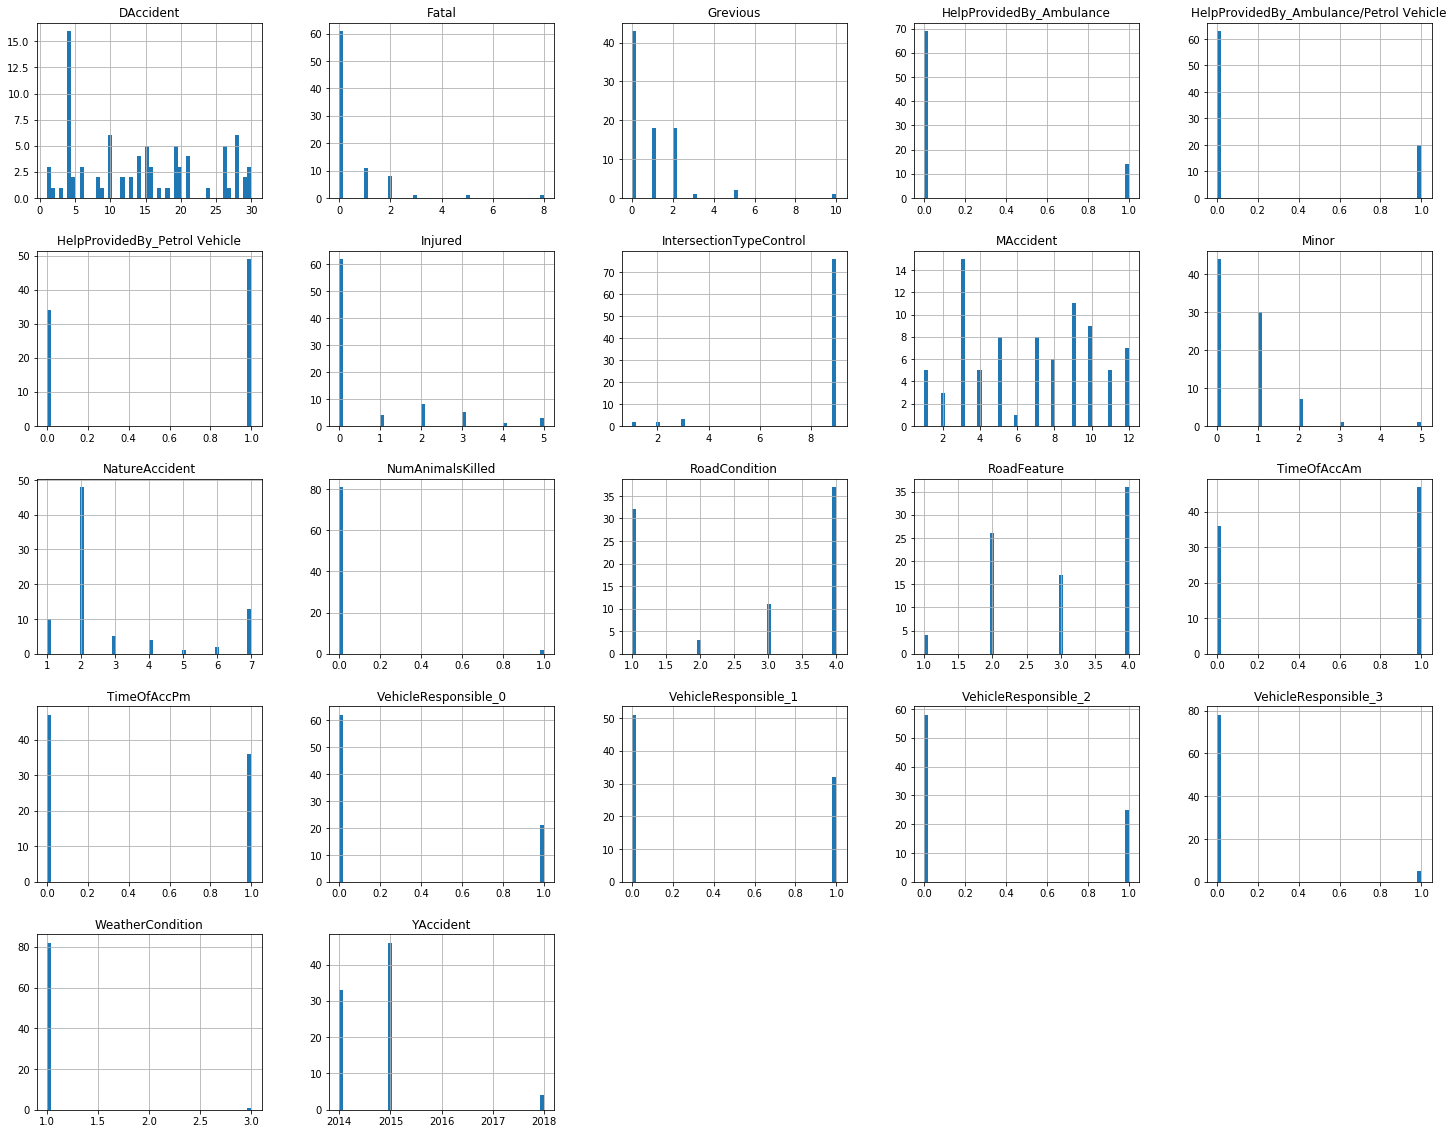

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
datasetAccident.hist(bins=50, figsize=(25,20))
plt.show()

### Save pre-processed data to 'NewNHAIAccidentData.csv'

In [17]:
datasetAccident.to_csv('NewNHAIAccidentData.csv')

### Separate out data for years 2014 and 2015

In [18]:
datasetAccident2015 = datasetAccident.loc[datasetAccident.YAccident==2015, datasetAccident.columns[:]].copy()
datasetAccident2014 = datasetAccident.loc[datasetAccident.YAccident==2014, datasetAccident.columns[:]].copy()

In [19]:
datasetAccident2014.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
1       72+500               7                        1      2            2   
14      80+000               7                        3      3            2   
18  91+800 LHS               2                        1      3            2   
20   60+200RHS               1                        1      4            2   
22  14+835 LHS               7                        2      5            3   

    RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
1               3                        9                 1      2         0   
14              1                        3                 1      0         0   
18              1                        1                 1      1         2   
20              4                        9                 1      2         2   
22              1                        9                 1      0         1   

    ...  HelpProvidedBy_Ambulance  HelpProvidedBy_Ambulance/Petrol Vehicle  \
1   ...                         1                                        0   
14  ...                         0                                        0   
18  ...                         1                                        0   
20  ...                         1                                        0   
22  ...                         0                                        1   

    HelpProvidedBy_Petrol Vehicle TimeOfAccHour  TimeOfAccAm  TimeOfAccPm  \
1                               0            07            1            0   
14                              1            01            0            1   
18                              0            09            1            0   
20                              0            05            1            0   
22                              0            10            0            1   

    VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
1                      1                     0                     0   
14                     1                     0                     0   
18                     0                     0                     1   
20                     0                     0                     1   
22                     0                     1                     0   

    VehicleResponsible_3  
1                      0  
14                     0  
18                     0  
20                     0  
22                     0  

[5 rows x 27 columns]

In [20]:
def eliminateFeature(dataset, feature):
    dataset = dataset.drop([feature],axis=1)
    return dataset

In [21]:
datasetAccident2015 = eliminateFeature(datasetAccident2015, 'YAccident')
datasetAccident2014 = eliminateFeature(datasetAccident2014, 'YAccident')
datasetAccident2015 = eliminateFeature(datasetAccident2015, 'Injured')
datasetAccident2014 = eliminateFeature(datasetAccident2014, 'Injured')
datasetAccident2015 = eliminateFeature(datasetAccident2015, 'Remarks')
datasetAccident2014 = eliminateFeature(datasetAccident2014, 'Remarks')
datasetAccident2015 = eliminateFeature(datasetAccident2015, 'AccLocation')
datasetAccident2014 = eliminateFeature(datasetAccident2014, 'AccLocation')
datasetAccident2015 = eliminateFeature(datasetAccident2015, 'Causes')
datasetAccident2014 = eliminateFeature(datasetAccident2014, 'Causes')

In [22]:
datasetAccident2014 = datasetAccident2014.drop(datasetAccident2014[datasetAccident2014.ClassificationOfAccident == '-'].index)
datasetAccident2015 = datasetAccident2015.drop(datasetAccident2015[datasetAccident2015.ClassificationOfAccident == '-'].index)

In [23]:
datasetAccident2015.head()

NatureAccident ClassificationOfAccident  RoadFeature  RoadCondition  \
0               2                        2            2              1   
3               1                        2            1              3   
4               2                        2            4              4   
5               2                        3            4              4   
6               2                        4            4              4   

   IntersectionTypeControl  WeatherCondition  Fatal  Grevious  Minor  \
0                        9                 1      0         2      1   
3                        9                 1      0         1      1   
4                        9                 1      0         2      1   
5                        9                 1      0         2      1   
6                        9                 1      0         2      1   

   NumAnimalsKilled  ...  HelpProvidedBy_Ambulance  \
0                 0  ...                         0   
3                 0  ...                         0   
4                 0  ...                         0   
5                 0  ...                         0   
6                 0  ...                         0   

   HelpProvidedBy_Ambulance/Petrol Vehicle  HelpProvidedBy_Petrol Vehicle  \
0                                        0                              1   
3                                        0                              1   
4                                        0                              1   
5                                        0                              1   
6                                        0                              1   

   TimeOfAccHour  TimeOfAccAm TimeOfAccPm  VehicleResponsible_0  \
0             09            1           0                     1   
3             05            1           0                     1   
4             08            1           0                     0   
5             08            1           0                     0   
6             08            1           0                     0   

   VehicleResponsible_1  VehicleResponsible_2  VehicleResponsible_3  
0                     0                     0                     0  
3                     0                     0                     0  
4                     1                     0                     0  
5                     1                     0                     0  
6                     1                     0                     0  

[5 rows x 22 columns]

### ML Model

In [24]:
train_y = datasetAccident2014['ClassificationOfAccident']
train_x = datasetAccident2014.drop(['ClassificationOfAccident'],axis=1)
test_y = datasetAccident2015['ClassificationOfAccident']
test_x=datasetAccident2015.drop(['ClassificationOfAccident'],axis=1)

In [26]:
test_y

0     2
3     2
4     2
5     3
6     4
7     3
8     3
9     4
10    3
12    2
15    2
16    3
17    3
19    2
21    3
25    2
26    4
30    2
31    3
32    4
38    3
39    1
42    2
43    4
46    2
47    1
49    2
52    3
53    2
54    4
55    4
59    2
61    3
64    3
65    1
68    1
69    1
70    3
71    2
74    1
75    2
76    4
80    1
84    1
87    2
88    2
Name: ClassificationOfAccident, dtype: object

#### SVM

In [25]:
SVMmodel_1 = svm.SVC(kernel='rbf')
SVMfitted_1 = SVMmodel_1.fit(train_x, train_y)

SVM_predictions_1 = SVMfitted_1.predict((test_x))

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(test_y, SVM_predictions_1),2) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(test_y, SVM_predictions_1))

# Model detailed classification report
target_names = ['class 1', 'class 2', 'class 3', 'class 4']
print ("---------------")
print("Classification report", metrics.classification_report(test_y, SVM_predictions_1,target_names = target_names))

Accuracy: 13.0 %
---------------
Confusion matrix
---------------
[[ 6  1  1  0]
 [16  0  1  0]
 [13  0  0  0]
 [ 8  0  0  0]]
---------------
Classification report               precision    recall  f1-score   support

     class 1       0.14      0.75      0.24         8
     class 2       0.00      0.00      0.00        17
     class 3       0.00      0.00      0.00        13
     class 4       0.00      0.00      0.00         8

   micro avg       0.13      0.13      0.13        46
   macro avg       0.03      0.19      0.06        46
weighted avg       0.02      0.13      0.04        46



C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### KNN

In [27]:
KNNnmodel_1 = KNeighborsClassifier(n_neighbors = 4)
KNNfitted_1 = KNNnmodel_1.fit(train_x, train_y)

In [28]:
KNN_predictions_1 = KNNfitted_1.predict((test_x))

In [29]:
print("Accuracy:",round(metrics.accuracy_score(test_y, KNN_predictions_1),2) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(test_y, KNN_predictions_1))

# Model detailed classification report
target_names = ['class 1', 'class 2', 'class 3', 'class 4']
print ("---------------")
print("Classification report", metrics.classification_report(test_y, KNN_predictions_1,target_names =target_names))

Accuracy: 17.0 %
---------------
Confusion matrix
---------------
[[ 3  4  1  0]
 [11  2  4  0]
 [ 8  1  3  1]
 [ 3  1  4  0]]
---------------
Classification report               precision    recall  f1-score   support

     class 1       0.12      0.38      0.18         8
     class 2       0.25      0.12      0.16        17
     class 3       0.25      0.23      0.24        13
     class 4       0.00      0.00      0.00         8

   micro avg       0.17      0.17      0.17        46
   macro avg       0.15      0.18      0.15        46
weighted avg       0.18      0.17      0.16        46



#### Decision Tree

In [30]:
DTmodel_1 = DecisionTreeClassifier() 
DTfitted_1 = DTmodel_1.fit(train_x, train_y)

In [31]:
DT_predictions_1 = DTfitted_1.predict((test_x))

In [32]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(test_y, DT_predictions_1),2) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(test_y, DT_predictions_1))

# Model detailed classification report
target_names = ['class 1', 'class 2', 'class 3', 'class 4']
print ("---------------")
print("Classification report", metrics.classification_report(test_y, DT_predictions_1,target_names =target_names))

Accuracy: 63.0 %
---------------
Confusion matrix
---------------
[[ 7  1  0  0]
 [ 2 13  2  0]
 [ 0  4  9  0]
 [ 3  4  1  0]]
---------------
Classification report               precision    recall  f1-score   support

     class 1       0.58      0.88      0.70         8
     class 2       0.59      0.76      0.67        17
     class 3       0.75      0.69      0.72        13
     class 4       0.00      0.00      0.00         8

   micro avg       0.63      0.63      0.63        46
   macro avg       0.48      0.58      0.52        46
weighted avg       0.53      0.63      0.57        46



C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Random Forest

In [33]:
rf = RandomForestClassifier(n_estimators=1000,
        max_depth=10, 
        max_features='auto', 
        bootstrap=True,
        oob_score=True,
        random_state=1)

In [34]:
rf.fit(train_x, train_y)
predicted_y_with_train_data = rf.predict(train_x)

In [35]:
def printClassifierPerformance (rf, train_X, actualY, predictedY):

    feature_importances = pd.DataFrame(rf.feature_importances_,index = train_X.columns,columns=['importance']).sort_values('importance', ascending=False)

    #print the feature importance - tbd
    print ('Feature Importance is ',feature_importances)
                                        
    #print the oob-score (out of box features error score)
    print ('Out of box features score is ',rf.oob_score_)

    #print the confusion matrix
    c_matrix = confusion_matrix(actualY, predictedY)
    print (c_matrix)
    print ('Accuracy score is',accuracy_score(actualY, predictedY))
    print ('Recall score is', recall_score(actualY, predictedY, average='weighted'))
    print ('Precision store is', precision_score(actualY, predictedY, average='weighted'))
    print ("F1 score is", f1_score(actualY, predictedY, average='weighted'))

    #print the classification report
    print (classification_report(actualY, predictedY))

In [36]:
print ('    ')
print ('********************* Classifier Performance Report On Training Data ***********************')

printClassifierPerformance(rf, train_x, train_y, predicted_y_with_train_data)

    
********************* Classifier Performance Report On Training Data ***********************
Feature Importance is                                           importance
Fatal                                      0.190456
Grevious                                   0.122150
Minor                                      0.112026
NatureAccident                             0.078987
DAccident                                  0.069890
TimeOfAccHour                              0.066698
MAccident                                  0.064117
IntersectionTypeControl                    0.035576
TimeOfAccAm                                0.033740
RoadFeature                                0.033688
TimeOfAccPm                                0.029650
HelpProvidedBy_Ambulance                   0.027868
VehicleResponsible_2                       0.025639
VehicleResponsible_3                       0.023207
HelpProvidedBy_Ambulance/Petrol Vehicle    0.020479
VehicleResponsible_0                       0.01

### Data Pre-processing

#### AccLocation

In [37]:
datasetAccident['AccLocation']

0           Ch. 69+5006
1                72+500
3                   NaN
4        126.800 KM RHS
5        126.800 KM RHS
6        126.800 KM RHS
7        160.110 KM RHS
8        115.600 KM RHS
9        115.600 KM RHS
10            Km.84+300
12       172.200 KM LHS
14               80+000
15       162.800 KM LHS
16        162.800 KMlhs
17          km96+100LHS
18           91+800 LHS
19           Ch.135+025
20            60+200RHS
21        164.850 KMLHS
22           14+835 LHS
23               27+800
24         92+000 (LHS)
25       126.800 KM LHS
26       126.800 KM LHS
27           24+650 RHS
28         28/400 (LHS)
29              117+500
30       109.000 KM RHS
31       109.000 KM RHS
32       109.000 KM RHS
            ...        
60              104+500
61       148.200 KM RHS
62           18+700 LHS
63              126+900
64            Km.89+500
65              125+000
66           17+150 LHS
67           14+550 LHS
68               86+000
69               86+000
70       164.200

In [38]:
locationAcc = datasetAccident['AccLocation']

#### AccLocation Ch

In [39]:
#result = locationAcc.str.extract(pat = '([Ch.].)') 
result = locationAcc.str.extract(pat = '([Ch.].)') 
result1 = result.drop(result[result[0] != 'Ch'].index)
# print the result 
print(result1) 
ind_Ch = result1.index
print(ind_Ch)

     0
0   Ch
19  Ch
59  Ch
80  Ch
84  Ch
Int64Index([0, 19, 59, 80, 84], dtype='int64')


In [40]:
for i in ind_Ch:
    print(datasetAccident.loc[i,'AccLocation'])

Ch. 69+5006
Ch.135+025
Ch.132+700
Ch.86+000
Ch.86+000


In [41]:
dataAcc = pd.DataFrame()
dataAcc = datasetAccident.copy()

In [42]:
for i in ind_Ch:
    dataAcc.loc[i,'AccLocation'] = dataAcc.loc[i,'AccLocation'].replace(" ","")
    print(dataAcc.loc[i,'AccLocation'])
    #print(datasetAccident.loc[i,'AccLocation'])

Ch.69+5006
Ch.135+025
Ch.132+700
Ch.86+000
Ch.86+000


In [43]:
dataAcc.loc[ind_Ch,'AccLocation'] = dataAcc.loc[ind_Ch,'AccLocation'].str.lstrip('Ch.')
dataAcc.loc[ind_Ch,'AccLocation'] = dataAcc.loc[ind_Ch,'AccLocation'].str.replace('+','.')
dataAcc.loc[ind_Ch,'AccLocation']

0     69.5006
19    135.025
59    132.700
80     86.000
84     86.000
Name: AccLocation, dtype: object

In [44]:
dataAcc.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  \
0         69.5006               2                        2      2   
1          72+500               7                        1      2   
3             NaN               1                        2      2   
4  126.800 KM RHS               2                        2      2   
5  126.800 KM RHS               2                        3      2   

   RoadFeature  RoadCondition  IntersectionTypeControl  WeatherCondition  \
0            2              1                        9                 1   
1            2              3                        9                 1   
3            1              3                        9                 1   
4            4              4                        9                 1   
5            4              4                        9                 1   

   Fatal  Grevious  ...  HelpProvidedBy_Ambulance  \
0      0         2  ...                         0   
1      2         0  ...                         1   
3      0         1  ...                         0   
4      0         2  ...                         0   
5      0         2  ...                         0   

   HelpProvidedBy_Ambulance/Petrol Vehicle  HelpProvidedBy_Petrol Vehicle  \
0                                        0                              1   
1                                        0                              0   
3                                        0                              1   
4                                        0                              1   
5                                        0                              1   

  TimeOfAccHour  TimeOfAccAm  TimeOfAccPm  VehicleResponsible_0  \
0            09            1            0                     1   
1            07            1            0                     1   
3            05            1            0                     1   
4            08            1            0                     0   
5            08            1            0                     0   

   VehicleResponsible_1  VehicleResponsible_2  VehicleResponsible_3  
0                     0                     0                     0  
1                     0                     0                     0  
3                     0                     0                     0  
4                     1                     0                     0  
5                     1                     0                     0  

[5 rows x 27 columns]

In [45]:
dataAcc['Ch'] = 0

In [46]:
dataAcc.loc[ind_Ch,'Ch'] = dataAcc.loc[ind_Ch,'AccLocation']
dataAcc['Ch']

0     69.5006
1           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
12          0
14          0
15          0
16          0
17          0
18          0
19    135.025
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
30          0
31          0
32          0
       ...   
60          0
61          0
62          0
63          0
64          0
65          0
66          0
67          0
68          0
69          0
70          0
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          0
79          0
80     86.000
81          0
82          0
83          0
84     86.000
85          0
87          0
88          0
89          0
90          0
Name: Ch, Length: 83, dtype: object

<font color=green, size=150px>

**DISCARD**
</font>

#### AccLocation RHS

In [158]:
dataAcc1 = dataAcc['AccLocation'].str.extract(pat = '(RHS)')
dataAcc2 = dataAcc1.drop(dataAcc1[dataAcc1[0] != 'RHS'].index)
ind_RHS = dataAcc2.index
ind_RHS

Int64Index([ 4,  5,  6,  7,  8,  9, 20, 27, 30, 31, 32, 33, 35, 37, 49, 50, 52,
            53, 54, 61, 71, 74, 75, 79, 81, 85, 90],
           dtype='int64')

In [159]:
dataA = datasetAccident.loc[ind_RHS]['AccLocation']
dataA

4        126.800 KM RHS
5        126.800 KM RHS
6        126.800 KM RHS
7        160.110 KM RHS
8        115.600 KM RHS
9        115.600 KM RHS
20            60+200RHS
27           24+650 RHS
30       109.000 KM RHS
31       109.000 KM RHS
32       109.000 KM RHS
33           16+700 RHS
35           19+350 RHS
37         23/400 (RHS)
49       157.400 KM RHS
50           20+700 RHS
52       162.800 KM RHS
53       138.250 KM RHS
54       138.250 KM RHS
61       148.200 KM RHS
71        Km.85+400 RHS
74       147.700 KM RHS
75       147.700 KM RHS
79    142.300KM,MCW,RHS
81           26+000 RHS
85          133+000 RHS
90       24+500 RHS S/R
Name: AccLocation, dtype: object

In [160]:
dataA = dataA.str.rstrip('RHS')
dataA = dataA.str.rstrip(')')
dataA = dataA.str.replace(" ","")
dataA

4          126.800KM
5          126.800KM
6          126.800KM
7          160.110KM
8          115.600KM
9          115.600KM
20            60+200
27            24+650
30         109.000KM
31         109.000KM
32         109.000KM
33            16+700
35            19+350
37        23/400(RHS
49         157.400KM
50            20+700
52         162.800KM
53         138.250KM
54         138.250KM
61         148.200KM
71         Km.85+400
74         147.700KM
75         147.700KM
79    142.300KM,MCW,
81            26+000
85           133+000
90       24+500RHSS/
Name: AccLocation, dtype: object

In [161]:
dataA = dataA.str.rstrip(',')
dataA = dataA.str.rstrip('/')
dataA = dataA.str.rstrip('RHS')
dataA = dataA.str.rstrip('KM')
dataA = dataA.str.rstrip('(')
dataA = dataA.str.rstrip('KM,MCW')
dataA = dataA.str.lstrip('Km.')
dataA = dataA.str.replace('+','.')
dataA = dataA.str.replace('/','.')

dataA

4     126.800
5     126.800
6     126.800
7     160.110
8     115.600
9     115.600
20     60.200
27     24.650
30    109.000
31    109.000
32    109.000
33     16.700
35     19.350
37     23.400
49    157.400
50     20.700
52    162.800
53    138.250
54    138.250
61    148.200
71     85.400
74    147.700
75    147.700
79    142.300
81     26.000
85    133.000
90     24.500
Name: AccLocation, dtype: object

In [162]:
for i in ind_RHS:
    dataAcc.loc[i,'AccLocation'] = dataAcc.loc[i,'AccLocation'].replace(" ","")
    print(datasetAccident.loc[i,'AccLocation'])

126.800KMRHS
126.800KMRHS
126.800KMRHS
160.110KMRHS
115.600KMRHS
115.600KMRHS
60+200RHS
24+650RHS
109.000KMRHS
109.000KMRHS
109.000KMRHS
16+700RHS
19+350RHS
23/400(RHS)
157.400KMRHS
20+700RHS
162.800KMRHS
138.250KMRHS
138.250KMRHS
148.200KMRHS
Km.85+400RHS
147.700KMRHS
147.700KMRHS
142.300KM,MCW,RHS
26+000RHS
133+000RHS
24+500RHSS/R


In [163]:
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip('RHS')
dataAcc.loc[ind_RHS,'AccLocation']

4          126.800KM
5          126.800KM
6          126.800KM
7          160.110KM
8          115.600KM
9          115.600KM
20            60+200
27            24+650
30         109.000KM
31         109.000KM
32         109.000KM
33            16+700
35            19+350
37       23/400(RHS)
49         157.400KM
50            20+700
52         162.800KM
53         138.250KM
54         138.250KM
61         148.200KM
71         Km.85+400
74         147.700KM
75         147.700KM
79    142.300KM,MCW,
81            26+000
85           133+000
90       24+500RHSS/
Name: AccLocation, dtype: object

In [164]:
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip(')')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip(',')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip('/')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip('RHS')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip('KM')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip('(')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.rstrip('KM,MCW')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.lstrip('Km.')
dataAcc.loc[ind_RHS,'AccLocation']

4     126.800
5     126.800
6     126.800
7     160.110
8     115.600
9     115.600
20     60+200
27     24+650
30    109.000
31    109.000
32    109.000
33     16+700
35     19+350
37     23/400
49    157.400
50     20+700
52    162.800
53    138.250
54    138.250
61    148.200
71     85+400
74    147.700
75    147.700
79    142.300
81     26+000
85    133+000
90     24+500
Name: AccLocation, dtype: object

In [165]:
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.replace('+','.')
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'AccLocation'].str.replace('/','.')
dataAcc.loc[ind_RHS,'AccLocation']

4     126.800
5     126.800
6     126.800
7     160.110
8     115.600
9     115.600
20     60.200
27     24.650
30    109.000
31    109.000
32    109.000
33     16.700
35     19.350
37     23.400
49    157.400
50     20.700
52    162.800
53    138.250
54    138.250
61    148.200
71     85.400
74    147.700
75    147.700
79    142.300
81     26.000
85    133.000
90     24.500
Name: AccLocation, dtype: object

### AccLocation LHS

In [166]:
dataAcc1 = pd.DataFrame()
dataAcc2 = pd.DataFrame()
dataAcc1 = dataAcc['AccLocation'].str.extract(pat = '(LHS)')
dataAcc2 = dataAcc1.drop(dataAcc1[dataAcc1[0] != 'LHS'].index)
ind_LHS = dataAcc2.index
ind_LHS

Int64Index([12, 15, 17, 18, 21, 22, 24, 25, 26, 28, 34, 36, 38, 39, 42, 43, 46,
            55, 57, 62, 66, 67, 70, 72, 73, 76, 77, 78, 82, 83, 87, 88, 89],
           dtype='int64')

In [167]:
dataAcc1 = pd.DataFrame()
dataAcc1 = dataAcc.loc[ind_LHS,'AccLocation']
dataAcc1

12       172.200 KM LHS
15       162.800 KM LHS
17          km96+100LHS
18           91+800 LHS
21        164.850 KMLHS
22           14+835 LHS
24         92+000 (LHS)
25       126.800 KM LHS
26       126.800 KM LHS
28         28/400 (LHS)
34           24+675 LHS
36         13/121 (LHS)
38       149.200 KM LHS
39       180.900 KM LHS
42       132.600 KM LHS
43       122.050 KM LHS
46       157.800 KM LHS
55       121.700 KM LHS
57       23+000 LHS S/R
62           18+700 LHS
66           17+150 LHS
67           14+550 LHS
70       164.200 KM LHS
72           13+500 LHS
73    162.050KM,OTH,LHS
76        122.100 KMLHS
77    153.900KM,MCW,LHS
78        112.600KM LHS
82           24+750 LHS
83           24+100 LHS
87       150.000 KM LHS
88       148.900 KM LHS
89           12+500 LHS
Name: AccLocation, dtype: object

In [168]:
dataAcc1 = dataAcc1.str.replace(" ","")
dataAcc1 = dataAcc1.str.rstrip('LHS')
dataAcc1 = dataAcc1.str.rstrip('S/R')
dataAcc1 = dataAcc1.str.rstrip('LHS')
dataAcc1 = dataAcc1.str.rstrip('KM')
dataAcc1 = dataAcc1.str.rstrip('KM,OTH,')
dataAcc1 = dataAcc1.str.rstrip('KM,MCW,')
dataAcc1 = dataAcc1.str.rstrip('(LHS)')
dataAcc1 = dataAcc1.str.lstrip('km')
dataAcc1 = dataAcc1.str.replace('+','.')
dataAcc1 = dataAcc1.str.replace('/','.')

dataAcc1

12    172.200
15    162.800
17     96.100
18     91.800
21    164.850
22     14.835
24     92.000
25    126.800
26    126.800
28     28.400
34     24.675
36     13.121
38    149.200
39    180.900
42    132.600
43    122.050
46    157.800
55    121.700
57     23.000
62     18.700
66     17.150
67     14.550
70    164.200
72     13.500
73    162.050
76    122.100
77    153.900
78    112.600
82     24.750
83     24.100
87    150.000
88    148.900
89     12.500
Name: AccLocation, dtype: object

In [170]:
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.replace(" ","")
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.rstrip('LHS')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.rstrip('S/R')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.rstrip('LHS')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.rstrip('KM')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.rstrip('KM,OTH,')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.rstrip('KM,MCW,')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.rstrip('(LHS)')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.lstrip('km')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.replace('+','.')
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'AccLocation'].str.replace('/','.')
dataAcc.loc[ind_LHS,'AccLocation']

12    172.200
15    162.800
17     96.100
18     91.800
21    164.850
22     14.835
24     92.000
25    126.800
26    126.800
28     28.400
34     24.675
36     13.121
38    149.200
39    180.900
42    132.600
43    122.050
46    157.800
55    121.700
57     23.000
62     18.700
66     17.150
67     14.550
70    164.200
72     13.500
73    162.050
76    122.100
77    153.900
78    112.600
82     24.750
83     24.100
87    150.000
88    148.900
89     12.500
Name: AccLocation, dtype: object

#### Creating new columns Ch, LHS, RHS

In [171]:
dataAcc['Ch'] = 0
dataAcc.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0     69.5006               2                        2      2            2   
1      72+500               7                        1      2            2   
3         NaN               1                        2      2            1   
4     126.800               2                        2      2            4   
5     126.800               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  HelpProvidedBy_Ambulance/Petrol Vehicle  \
0  ...                                        0   
1  ...                                        0   
3  ...                                        0   
4  ...                                        0   
5  ...                                        0   

   HelpProvidedBy_Petrol Vehicle  TimeOfAccHour TimeOfAccAm  TimeOfAccPm  \
0                              1             09           1            0   
1                              0             07           1            0   
3                              1             05           1            0   
4                              1             08           1            0   
5                              1             08           1            0   

   VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
0                     1                     0                     0   
1                     1                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   
5                     0                     1                     0   

   VehicleResponsible_3  Ch  
0                     0   0  
1                     0   0  
3                     0   0  
4                     0   0  
5                     0   0  

[5 rows x 28 columns]

In [174]:
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.replace('Nan','0.0')
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.lstrip('Km.')
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.rstrip('KMlhs')
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.replace('+','.')
dataAcc['AccLocation']

0      69.5006
1       72.500
3          NaN
4      126.800
5      126.800
6      126.800
7      160.110
8      115.600
9      115.600
10      84.300
12     172.200
14      80.000
15     162.800
16    162.800 
17      96.100
18      91.800
19     135.025
20      60.200
21     164.850
22      14.835
23      27.800
24      92.000
25     126.800
26     126.800
27      24.650
28      28.400
29     117.500
30     109.000
31     109.000
32     109.000
        ...   
60     104.500
61     148.200
62      18.700
63     126.900
64      89.500
65     125.000
66      17.150
67      14.550
68      86.000
69      86.000
70     164.200
71      85.400
72      13.500
73     162.050
74     147.700
75     147.700
76     122.100
77     153.900
78     112.600
79     142.300
80      86.000
81      26.000
82      24.750
83      24.100
84      86.000
85     133.000
87     150.000
88     148.900
89      12.500
90      24.500
Name: AccLocation, Length: 83, dtype: object

In [175]:
dataAcc.loc[ind_Ch,'Ch'] = dataAcc.loc[ind_Ch,'AccLocation']
dataAcc['Ch']

0     69.5006
1           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
12          0
14          0
15          0
16          0
17          0
18          0
19    135.025
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
30          0
31          0
32          0
       ...   
60          0
61          0
62          0
63          0
64          0
65          0
66          0
67          0
68          0
69          0
70          0
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          0
79          0
80     86.000
81          0
82          0
83          0
84     86.000
85          0
87          0
88          0
89          0
90          0
Name: Ch, Length: 83, dtype: object

In [176]:
dataAcc['LHS'] = 0

In [177]:
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'AccLocation']
dataAcc['LHS']

0           0
1           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
12    172.200
14          0
15    162.800
16          0
17     96.100
18     91.800
19          0
20          0
21    164.850
22     14.835
23          0
24     92.000
25    126.800
26    126.800
27          0
28     28.400
29          0
30          0
31          0
32          0
       ...   
60          0
61          0
62     18.700
63          0
64          0
65          0
66     17.150
67     14.550
68          0
69          0
70    164.200
71          0
72     13.500
73    162.050
74          0
75          0
76    122.100
77    153.900
78    112.600
79          0
80          0
81          0
82     24.750
83     24.100
84          0
85          0
87    150.000
88    148.900
89     12.500
90          0
Name: LHS, Length: 83, dtype: object

In [179]:
dataAcc['RHS'] = 0

In [180]:
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'AccLocation']
dataAcc['RHS']

0           0
1           0
3           0
4     126.800
5     126.800
6     126.800
7     160.110
8     115.600
9     115.600
10          0
12          0
14          0
15          0
16          0
17          0
18          0
19          0
20     60.200
21          0
22          0
23          0
24          0
25          0
26          0
27     24.650
28          0
29          0
30    109.000
31    109.000
32    109.000
       ...   
60          0
61    148.200
62          0
63          0
64          0
65          0
66          0
67          0
68          0
69          0
70          0
71     85.400
72          0
73          0
74    147.700
75    147.700
76          0
77          0
78          0
79    142.300
80          0
81     26.000
82          0
83          0
84          0
85    133.000
87          0
88          0
89          0
90     24.500
Name: RHS, Length: 83, dtype: object

In [181]:
dataAcc.loc[ind_LHS,'AccLocation'] = 0
dataAcc.loc[ind_RHS,'AccLocation'] = 0
dataAcc.loc[ind_Ch,'AccLocation'] = 0
dataAcc['AccLocation']

0            0
1       72.500
3          NaN
4            0
5            0
6            0
7            0
8            0
9            0
10      84.300
12           0
14      80.000
15           0
16    162.800 
17           0
18           0
19           0
20           0
21           0
22           0
23      27.800
24           0
25           0
26           0
27           0
28           0
29     117.500
30           0
31           0
32           0
        ...   
60     104.500
61           0
62           0
63     126.900
64      89.500
65     125.000
66           0
67           0
68      86.000
69      86.000
70           0
71           0
72           0
73           0
74           0
75           0
76           0
77           0
78           0
79           0
80           0
81           0
82           0
83           0
84           0
85           0
87           0
88           0
89           0
90           0
Name: AccLocation, Length: 83, dtype: object

In [182]:
dataAcc.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0           0               2                        2      2            2   
1      72.500               7                        1      2            2   
3         NaN               1                        2      2            1   
4           0               2                        2      2            4   
5           0               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  TimeOfAccHour  TimeOfAccAm  TimeOfAccPm VehicleResponsible_0  \
0  ...             09            1            0                    1   
1  ...             07            1            0                    1   
3  ...             05            1            0                    1   
4  ...             08            1            0                    0   
5  ...             08            1            0                    0   

   VehicleResponsible_1  VehicleResponsible_2  VehicleResponsible_3       Ch  \
0                     0                     0                     0  69.5006   
1                     0                     0                     0        0   
3                     0                     0                     0        0   
4                     1                     0                     0        0   
5                     1                     0                     0        0   

   LHS      RHS  
0    0        0  
1    0        0  
3    0        0  
4    0  126.800  
5    0  126.800  

[5 rows x 30 columns]

In [183]:
datasetAccident.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0           0               2                        2      2            2   
1      72.500               7                        1      2            2   
3         NaN               1                        2      2            1   
4           0               2                        2      2            4   
5           0               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  TimeOfAccHour  TimeOfAccAm  TimeOfAccPm VehicleResponsible_0  \
0  ...             09            1            0                    1   
1  ...             07            1            0                    1   
3  ...             05            1            0                    1   
4  ...             08            1            0                    0   
5  ...             08            1            0                    0   

   VehicleResponsible_1  VehicleResponsible_2  VehicleResponsible_3       Ch  \
0                     0                     0                     0  69.5006   
1                     0                     0                     0        0   
3                     0                     0                     0        0   
4                     1                     0                     0        0   
5                     1                     0                     0        0   

   LHS      RHS  
0    0        0  
1    0        0  
3    0        0  
4    0  126.800  
5    0  126.800  

[5 rows x 30 columns]

In [184]:
resultA = dataAcc[dataAcc['AccLocation'] != 0]['AccLocation']
resultA

1       72.500
3          NaN
10      84.300
14      80.000
16    162.800 
23      27.800
29     117.500
41     131.600
44     117.000
45         NaN
47     128.000
51      91.800
60     104.500
63     126.900
64      89.500
65     125.000
68      86.000
69      86.000
Name: AccLocation, dtype: object

In [185]:
resultA = resultA.str.replace(" ","")
resultA = resultA.fillna(0)
ind_space = resultA.index

In [186]:
ind_space

Int64Index([1, 3, 10, 14, 16, 23, 29, 41, 44, 45, 47, 51, 60, 63, 64, 65, 68,
            69],
           dtype='int64')

In [187]:
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.replace(" ","")
dataAcc['AccLocation'] = dataAcc['AccLocation'].fillna(0)
dataAcc['AccLocation']

0           0
1      72.500
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10     84.300
12          0
14     80.000
15          0
16    162.800
17          0
18          0
19          0
20          0
21          0
22          0
23     27.800
24          0
25          0
26          0
27          0
28          0
29    117.500
30          0
31          0
32          0
       ...   
60    104.500
61          0
62          0
63    126.900
64     89.500
65    125.000
66          0
67          0
68     86.000
69     86.000
70          0
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          0
79          0
80          0
81          0
82          0
83          0
84          0
85          0
87          0
88          0
89          0
90          0
Name: AccLocation, Length: 83, dtype: object

In [188]:
dataAcc.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0           0               2                        2      2            2   
1      72.500               7                        1      2            2   
3           0               1                        2      2            1   
4           0               2                        2      2            4   
5           0               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  TimeOfAccHour  TimeOfAccAm  TimeOfAccPm VehicleResponsible_0  \
0  ...             09            1            0                    1   
1  ...             07            1            0                    1   
3  ...             05            1            0                    1   
4  ...             08            1            0                    0   
5  ...             08            1            0                    0   

   VehicleResponsible_1  VehicleResponsible_2  VehicleResponsible_3       Ch  \
0                     0                     0                     0  69.5006   
1                     0                     0                     0        0   
3                     0                     0                     0        0   
4                     1                     0                     0        0   
5                     1                     0                     0        0   

   LHS      RHS  
0    0        0  
1    0        0  
3    0        0  
4    0  126.800  
5    0  126.800  

[5 rows x 30 columns]

In [189]:
dataAcc.to_csv("NewNHAI2.csv")

### Covert to floats  = AccLocation, Ch, LHS, RHS

In [210]:
dataAcc['Ch'][0]

'69.5006'

In [211]:
dataAcc['Ch'] = dataAcc['Ch'].astype(float)

In [212]:
dataAcc['Ch'][0]

69.5006

In [223]:
dataAcc['LHS'][12]

'172.200'

In [224]:
dataAcc['LHS'] = dataAcc['LHS'].astype(float)

In [225]:
dataAcc['LHS'][12]

172.2

In [227]:
dataAcc['RHS'][4]

'126.800'

In [228]:
dataAcc['RHS'] = dataAcc['RHS'].astype(float)

In [229]:
dataAcc['RHS'][4]

126.8

In [230]:
dataAcc['AccLocation'][1]

'72.500'

In [231]:
dataAcc['AccLocation'] = dataAcc['AccLocation'].astype(float)

In [232]:
dataAcc['AccLocation'][1]

72.5

In [209]:
#df['col'] = df['col'].astype(float)
#df['col'][0]

1.231

In [233]:
dataAcc['Ch'][0]

69.5006

In [235]:
r = dataAcc['Ch'][0]*0.0201168
r

1.39812967008

In [238]:
dataAcc['Ch'][ind_Ch] = dataAcc['Ch'][ind_Ch]*49.709695378987

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [239]:
dataAcc['Ch'][ind_Ch]

0      69.5006
19    135.0250
59    132.7000
80     86.0000
84     86.0000
Name: Ch, dtype: float64

In [241]:
dataAcc['AccLocation'][ind_Ch] = dataAcc['Ch'][ind_Ch]

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
dataAcc['AccLocation'][ind_Ch]

0      69.5006
19    135.0250
59    132.7000
80     86.0000
84     86.0000
Name: AccLocation, dtype: float64

In [243]:
dataAcc = dataAcc.drop(['Ch'],axis=1)

In [244]:
dataAcc.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0      69.5006               2                        2      2            2   
1      72.5000               7                        1      2            2   
3       0.0000               1                        2      2            1   
4       0.0000               2                        2      2            4   
5       0.0000               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  HelpProvidedBy_Petrol Vehicle  TimeOfAccHour  TimeOfAccAm TimeOfAccPm  \
0  ...                              1             09            1           0   
1  ...                              0             07            1           0   
3  ...                              1             05            1           0   
4  ...                              1             08            1           0   
5  ...                              1             08            1           0   

   VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
0                     1                     0                     0   
1                     1                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   
5                     0                     1                     0   

   VehicleResponsible_3  LHS    RHS  
0                     0  0.0    0.0  
1                     0  0.0    0.0  
3                     0  0.0    0.0  
4                     0  0.0  126.8  
5                     0  0.0  126.8  

[5 rows x 29 columns]

<font color=green, size=150px>

**DISCARD END**
</font>

<font color=blue, size=150px>

**Q2**
</font>

In [47]:
dataAcc['AccLocation']

0               69.5006
1                72+500
3                   NaN
4        126.800 KM RHS
5        126.800 KM RHS
6        126.800 KM RHS
7        160.110 KM RHS
8        115.600 KM RHS
9        115.600 KM RHS
10            Km.84+300
12       172.200 KM LHS
14               80+000
15       162.800 KM LHS
16        162.800 KMlhs
17          km96+100LHS
18           91+800 LHS
19              135.025
20            60+200RHS
21        164.850 KMLHS
22           14+835 LHS
23               27+800
24         92+000 (LHS)
25       126.800 KM LHS
26       126.800 KM LHS
27           24+650 RHS
28         28/400 (LHS)
29              117+500
30       109.000 KM RHS
31       109.000 KM RHS
32       109.000 KM RHS
            ...        
60              104+500
61       148.200 KM RHS
62           18+700 LHS
63              126+900
64            Km.89+500
65              125+000
66           17+150 LHS
67           14+550 LHS
68               86+000
69               86+000
70       164.200

In [48]:
dataAcc1 = dataAcc['AccLocation'].str.extract(pat = '(RHS)')
dataAcc2 = dataAcc1.drop(dataAcc1[dataAcc1[0] != 'RHS'].index)
ind_RHS = dataAcc2.index
ind_RHS

Int64Index([ 4,  5,  6,  7,  8,  9, 20, 27, 30, 31, 32, 33, 35, 37, 49, 50, 52,
            53, 54, 61, 71, 74, 75, 79, 81, 85, 90],
           dtype='int64')

In [49]:
dataAcc['RHS'] = 0
dataAcc['RHS'].head()

0    0
1    0
3    0
4    0
5    0
Name: RHS, dtype: int64

In [50]:
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'AccLocation']
dataAcc['RHS'].head()

0                 0
1                 0
3                 0
4    126.800 KM RHS
5    126.800 KM RHS
Name: RHS, dtype: object

In [51]:
dataAcc1 = dataAcc['AccLocation'].str.extract(pat = '(LHS)')
dataAcc2 = dataAcc1.drop(dataAcc1[dataAcc1[0] != 'LHS'].index)
ind_LHS = dataAcc2.index
ind_LHS

Int64Index([12, 15, 17, 18, 21, 22, 24, 25, 26, 28, 34, 36, 38, 39, 42, 43, 46,
            55, 57, 62, 66, 67, 70, 72, 73, 76, 77, 78, 82, 83, 87, 88, 89],
           dtype='int64')

In [52]:
dataAcc['LHS'] = 0
dataAcc['LHS'].head()

0    0
1    0
3    0
4    0
5    0
Name: LHS, dtype: int64

In [53]:
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'AccLocation']
dataAcc['LHS'].head()

0    0
1    0
3    0
4    0
5    0
Name: LHS, dtype: object

In [54]:
dataAcc['LHS']

0                     0
1                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
10                    0
12       172.200 KM LHS
14                    0
15       162.800 KM LHS
16                    0
17          km96+100LHS
18           91+800 LHS
19                    0
20                    0
21        164.850 KMLHS
22           14+835 LHS
23                    0
24         92+000 (LHS)
25       126.800 KM LHS
26       126.800 KM LHS
27                    0
28         28/400 (LHS)
29                    0
30                    0
31                    0
32                    0
            ...        
60                    0
61                    0
62           18+700 LHS
63                    0
64                    0
65                    0
66           17+150 LHS
67           14+550 LHS
68                    0
69                    0
70       164.200

In [55]:
dataAcc.loc[ind_Ch,'AccLocation'] = datasetAccident.loc[ind_Ch,'AccLocation']
dataAcc.loc[ind_Ch,'AccLocation']

0     Ch. 69+5006
19     Ch.135+025
59     Ch.132+700
80      Ch.86+000
84      Ch.86+000
Name: AccLocation, dtype: object

In [56]:
print(dataAcc['AccLocation'])

0           Ch. 69+5006
1                72+500
3                   NaN
4        126.800 KM RHS
5        126.800 KM RHS
6        126.800 KM RHS
7        160.110 KM RHS
8        115.600 KM RHS
9        115.600 KM RHS
10            Km.84+300
12       172.200 KM LHS
14               80+000
15       162.800 KM LHS
16        162.800 KMlhs
17          km96+100LHS
18           91+800 LHS
19           Ch.135+025
20            60+200RHS
21        164.850 KMLHS
22           14+835 LHS
23               27+800
24         92+000 (LHS)
25       126.800 KM LHS
26       126.800 KM LHS
27           24+650 RHS
28         28/400 (LHS)
29              117+500
30       109.000 KM RHS
31       109.000 KM RHS
32       109.000 KM RHS
            ...        
60              104+500
61       148.200 KM RHS
62           18+700 LHS
63              126+900
64            Km.89+500
65              125+000
66           17+150 LHS
67           14+550 LHS
68               86+000
69               86+000
70       164.200

### MCW

In [57]:
dataAcc1 = dataAcc['AccLocation'].str.extract(pat = '(MCW)')
dataAcc2 = dataAcc1.drop(dataAcc1[dataAcc1[0] != 'MCW'].index)
ind_MCW = dataAcc2.index
ind_MCW

Int64Index([77, 79], dtype='int64')

In [58]:
dataAcc.loc[ind_MCW,'AccLocation']

77    153.900KM,MCW,LHS
79    142.300KM,MCW,RHS
Name: AccLocation, dtype: object

#### Remove MCW data points from RHS and LHS

In [59]:
for i in range(0,33):
    for j in range(0,1):
        if ind_LHS[i] == ind_MCW[j]:
            print(ind_LHS[i]," index = ",i)

77  index =  26


In [60]:
ind_LHS[26]

77

In [61]:
dataAcc.loc[ind_LHS[26],'LHS'] = 0
dataAcc.loc[ind_LHS[26],'LHS']

0

In [62]:
for i in range(0,27):
    for j in range(0,2):
        if ind_RHS[i] == ind_MCW[j]:
            print(ind_RHS[i]," index = ",i)

79  index =  23


In [63]:
dataAcc.loc[ind_RHS[23],'RHS'] = 0
dataAcc.loc[ind_RHS[23],'RHS']

0

In [64]:
dataAcc['MCW'] = 0

In [65]:
dataAcc.loc[ind_MCW,'MCW'] = dataAcc.loc[ind_MCW,'AccLocation']
dataAcc['MCW']

0                     0
1                     0
3                     0
4                     0
5                     0
6                     0
7                     0
8                     0
9                     0
10                    0
12                    0
14                    0
15                    0
16                    0
17                    0
18                    0
19                    0
20                    0
21                    0
22                    0
23                    0
24                    0
25                    0
26                    0
27                    0
28                    0
29                    0
30                    0
31                    0
32                    0
            ...        
60                    0
61                    0
62                    0
63                    0
64                    0
65                    0
66                    0
67                    0
68                    0
69                    0
70              

In [66]:
for i in ind_MCW:
    dataAcc.loc[i,'MCW'] = dataAcc.loc[i,'MCW'].replace(" ","")
    dataAcc.loc[i,'MCW'] = dataAcc.loc[i,'MCW'].replace(",","")
    dataAcc.loc[i,'MCW'] = dataAcc.loc[i,'MCW'].replace("MCW","")
    dataAcc.loc[i,'MCW'] = dataAcc.loc[i,'MCW'].replace("LHS","")
    dataAcc.loc[i,'MCW'] = dataAcc.loc[i,'MCW'].replace("RHS","")
    dataAcc.loc[i,'MCW'] = dataAcc.loc[i,'MCW'].replace("KM","")
    print(dataAcc.loc[i,'MCW'])

153.900
142.300


### ROW

In [67]:
dataAcc1 = dataAcc['AccLocation'].str.extract(pat = '(ROW)')
dataAcc2 = dataAcc1.drop(dataAcc1[dataAcc1[0] != 'ROW'].index)
ind_ROW = dataAcc2.index
ind_ROW

Int64Index([], dtype='int64')

In [68]:
dataAcc.loc[ind_LHS,'LHS']

12       172.200 KM LHS
15       162.800 KM LHS
17          km96+100LHS
18           91+800 LHS
21        164.850 KMLHS
22           14+835 LHS
24         92+000 (LHS)
25       126.800 KM LHS
26       126.800 KM LHS
28         28/400 (LHS)
34           24+675 LHS
36         13/121 (LHS)
38       149.200 KM LHS
39       180.900 KM LHS
42       132.600 KM LHS
43       122.050 KM LHS
46       157.800 KM LHS
55       121.700 KM LHS
57       23+000 LHS S/R
62           18+700 LHS
66           17+150 LHS
67           14+550 LHS
70       164.200 KM LHS
72           13+500 LHS
73    162.050KM,OTH,LHS
76        122.100 KMLHS
77                    0
78        112.600KM LHS
82           24+750 LHS
83           24+100 LHS
87       150.000 KM LHS
88       148.900 KM LHS
89           12+500 LHS
Name: LHS, dtype: object

In [69]:
type(ind_LHS)

pandas.core.indexes.numeric.Int64Index

In [79]:
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace('+','.')
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("OTH","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("LHS","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("km","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("KM","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("S/R","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("(","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace(")","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("+",".")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace("/",".")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace(" ","")
dataAcc.loc[ind_LHS,'LHS'] = dataAcc.loc[ind_LHS,'LHS'].str.replace(",","")
dataAcc.loc[ind_LHS,'LHS']

12    172.200
15    162.800
17     96.100
18     91.800
21    164.850
22     14.835
24     92.000
25    126.800
26    126.800
28     28.400
34     24.675
36     13.121
38    149.200
39    180.900
42    132.600
43    122.050
46    157.800
55    121.700
57     23.000
62     18.700
66     17.150
67     14.550
70    164.200
72     13.500
73    162.050
76    122.100
77        NaN
78    112.600
82     24.750
83     24.100
87    150.000
88    148.900
89     12.500
Name: LHS, dtype: object

In [77]:
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace('+','.')
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("RHS","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("km","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("KM","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("S/R","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("(","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("+",".")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("/",".")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace(" ","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("Km.","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace(")","")
dataAcc.loc[ind_RHS,'RHS']

4     126.800
5     126.800
6     126.800
7     160.110
8     115.600
9     115.600
20     60.200
27     24.650
30    109.000
31    109.000
32    109.000
33     16.700
35     19.350
37     23.400
49    157.400
50     20.700
52    162.800
53    138.250
54    138.250
61    148.200
71     85.400
74    147.700
75    147.700
79        NaN
81     26.000
85    133.000
90     24.500
Name: RHS, dtype: object

In [80]:
dataAcc.loc[ind_LHS,'LHS']

12    172.200
15    162.800
17     96.100
18     91.800
21    164.850
22     14.835
24     92.000
25    126.800
26    126.800
28     28.400
34     24.675
36     13.121
38    149.200
39    180.900
42    132.600
43    122.050
46    157.800
55    121.700
57     23.000
62     18.700
66     17.150
67     14.550
70    164.200
72     13.500
73    162.050
76    122.100
77        NaN
78    112.600
82     24.750
83     24.100
87    150.000
88    148.900
89     12.500
Name: LHS, dtype: object

In [81]:
dataAcc.loc[ind_Ch,'Ch']

0     69.5006
19    135.025
59    132.700
80     86.000
84     86.000
Name: Ch, dtype: object

In [81]:
dataAcc.loc[ind_MCW,'MCW']

77    153.900
79    142.300
Name: MCW, dtype: object

In [82]:
dataAcc.loc[ind_Ch,'AccLocation'] = dataAcc.loc[ind_Ch,'Ch']
dataAcc.loc[ind_Ch,'AccLocation']

0     69.5006
19    135.025
59    132.700
80     86.000
84     86.000
Name: AccLocation, dtype: object

In [83]:
dataAcc.loc[ind_LHS,'AccLocation'] = dataAcc.loc[ind_LHS,'LHS']
dataAcc.loc[ind_LHS,'AccLocation']

12    172.200
15    162.800
17     96.100
18     91.800
21    164.850
22     14.835
24     92.000
25    126.800
26    126.800
28     28.400
34     24.675
36     13.121
38    149.200
39    180.900
42    132.600
43    122.050
46    157.800
55    121.700
57     23.000
62     18.700
66     17.150
67     14.550
70    164.200
72     13.500
73    162.050
76    122.100
77        NaN
78    112.600
82     24.750
83     24.100
87    150.000
88    148.900
89     12.500
Name: AccLocation, dtype: object

In [84]:
dataAcc.loc[ind_RHS,'AccLocation'] = dataAcc.loc[ind_RHS,'RHS']
dataAcc.loc[ind_RHS,'AccLocation']

4     126.800
5     126.800
6     126.800
7     160.110
8     115.600
9     115.600
20     60.200
27     24.650
30    109.000
31    109.000
32    109.000
33     16.700
35     19.350
37     23.400
49    157.400
50     20.700
52    162.800
53    138.250
54    138.250
61    148.200
71     85.400
74    147.700
75    147.700
79        NaN
81     26.000
85    133.000
90     24.500
Name: AccLocation, dtype: object

In [85]:
dataAcc.loc[ind_Ch,'Category'] = 'Ch'

In [86]:
dataAcc.loc[ind_MCW,'Category'] = 'MCW'
dataAcc.loc[ind_LHS,'Category'] = 'LHS'
dataAcc.loc[ind_RHS,'Category'] = 'RHS'

In [87]:
dataAcc['Category'].fillna('Other')

0        Ch
1     Other
3     Other
4       RHS
5       RHS
6       RHS
7       RHS
8       RHS
9       RHS
10    Other
12      LHS
14    Other
15      LHS
16    Other
17      LHS
18      LHS
19       Ch
20      RHS
21      LHS
22      LHS
23    Other
24      LHS
25      LHS
26      LHS
27      RHS
28      LHS
29    Other
30      RHS
31      RHS
32      RHS
      ...  
60    Other
61      RHS
62      LHS
63    Other
64    Other
65    Other
66      LHS
67      LHS
68    Other
69    Other
70      LHS
71      RHS
72      LHS
73      LHS
74      RHS
75      RHS
76      LHS
77      LHS
78      LHS
79      RHS
80       Ch
81      RHS
82      LHS
83      LHS
84       Ch
85      RHS
87      LHS
88      LHS
89      LHS
90      RHS
Name: Category, Length: 83, dtype: object

In [88]:
dataAcc.loc[ind_MCW,'Category'] = 'MCW'

In [89]:
dataAcc['Category'].fillna('Other',inplace = True)

In [90]:
dataAcc['Category']

0        Ch
1     Other
3     Other
4       RHS
5       RHS
6       RHS
7       RHS
8       RHS
9       RHS
10    Other
12      LHS
14    Other
15      LHS
16    Other
17      LHS
18      LHS
19       Ch
20      RHS
21      LHS
22      LHS
23    Other
24      LHS
25      LHS
26      LHS
27      RHS
28      LHS
29    Other
30      RHS
31      RHS
32      RHS
      ...  
60    Other
61      RHS
62      LHS
63    Other
64    Other
65    Other
66      LHS
67      LHS
68    Other
69    Other
70      LHS
71      RHS
72      LHS
73      LHS
74      RHS
75      RHS
76      LHS
77      MCW
78      LHS
79      MCW
80       Ch
81      RHS
82      LHS
83      LHS
84       Ch
85      RHS
87      LHS
88      LHS
89      LHS
90      RHS
Name: Category, Length: 83, dtype: object

In [ ]:
dataAcc['AccLocation'] = dataAcc.loc[ind_RHS,'RHS'].str.replace('+','.')
dataAcc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("RHS","")
dataAcc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("km","")
dataAcc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("KM","")
dataAcc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("S/R","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("(","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("+",".")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("/",".")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace(" ","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace("Km.","")
dataAcc.loc[ind_RHS,'RHS'] = dataAcc.loc[ind_RHS,'RHS'].str.replace(")","")
dataAcc.loc[ind_RHS,'RHS']

In [91]:
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.replace("Km.","")
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.replace("KMlhs","")
dataAcc['AccLocation'] = dataAcc['AccLocation'].str.replace("+",".")

In [92]:
dataAcc['AccLocation'].fillna('0.0', inplace = True)

In [93]:
dataAcc['AccLocation'] = dataAcc['AccLocation'].astype(float)

In [94]:
dataAcc_New = pd.DataFrame()
dataAcc_New = dataAcc.copy()
dataAcc_New

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0       69.5006               2                        2      2            2   
1       72.5000               7                        1      2            2   
3        0.0000               1                        2      2            1   
4      126.8000               2                        2      2            4   
5      126.8000               2                        3      2            4   
6      126.8000               2                        4      2            4   
7      160.1100               2                        3      2            4   
8      115.6000               2                        3      2            4   
9      115.6000               2                        4      2            4   
10      84.3000               2                        3      2            2   
12     172.2000               2                        2      2            4   
14      80.0000               7                        3      3            2   
15     162.8000               2                        2      2            4   
16     162.8000               2                        3      2            4   
17      96.1000               2                        3      2            1   
18      91.8000               2                        1      3            2   
19     135.0250               2                        2      2            2   
20      60.2000               1                        1      4            2   
21     164.8500               1                        3      2            4   
22      14.8350               7                        2      5            3   
23      27.8000               1                        3      2            3   
24      92.0000               1                        1      3            2   
25     126.8000               2                        2      2            4   
26     126.8000               2                        4      2            4   
27      24.6500               3                        2      5            2   
28      28.4000               3                        4      2            3   
29     117.5000               7                        1      3            2   
30     109.0000               2                        2      2            4   
31     109.0000               2                        3      2            4   
32     109.0000               2                        4      2            4   
..          ...             ...                      ...    ...          ...   
60     104.5000               7                        1      2            2   
61     148.2000               2                        3      2            4   
62      18.7000               7                        2      2            3   
63     126.9000               2                        1      -            2   
64      89.5000               2                        3      2            2   
65     125.0000               2                        1      2            2   
66      17.1500               5                        4      7            3   
67      14.5500               4                        2      4            3   
68      86.0000               7                        1      2            1   
69      86.0000               1                        1      2            2   
70     164.2000               2                        3      2            4   
71      85.4000               2                        2      2            1   
72      13.5000               2                        2      2            3   
73     162.0500               7                        1      4            4   
74     147.7000               2                        1      2            4   
75     147.7000               2                        2      2            4   
76     122.1000               2                        4      2            4   
77       0.0000               2                        1      2            4   
78  

In [96]:
dataAcc_New = eliminateFeature(dataAcc_New, 'Ch')
dataAcc_New = eliminateFeature(dataAcc_New, 'LHS')
dataAcc_New = eliminateFeature(dataAcc_New, 'RHS')
dataAcc_New = eliminateFeature(dataAcc_New, 'MCW')
dataAcc_New.head()

KeyError: "['Ch'] not found in axis"

In [97]:
dataAcc_New.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0      69.5006               2                        2      2            2   
1      72.5000               7                        1      2            2   
3       0.0000               1                        2      2            1   
4     126.8000               2                        2      2            4   
5     126.8000               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  HelpProvidedBy_Ambulance/Petrol Vehicle  \
0  ...                                        0   
1  ...                                        0   
3  ...                                        0   
4  ...                                        0   
5  ...                                        0   

   HelpProvidedBy_Petrol Vehicle  TimeOfAccHour TimeOfAccAm  TimeOfAccPm  \
0                              1             09           1            0   
1                              0             07           1            0   
3                              1             05           1            0   
4                              1             08           1            0   
5                              1             08           1            0   

   VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
0                     1                     0                     0   
1                     1                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   
5                     0                     1                     0   

   VehicleResponsible_3  Category  
0                     0        Ch  
1                     0     Other  
3                     0     Other  
4                     0       RHS  
5                     0       RHS  

[5 rows x 28 columns]

In [98]:
dataAcc_New.to_csv("NHAI_dataAcc_New.csv")

In [99]:
dataAcc_New1 = dataAcc_New.copy()

In [100]:
from sklearn.preprocessing import StandardScaler
dataAcc_New1['AccLocationNew'] = StandardScaler().fit_transform(dataAcc_New1['AccLocation'].values.reshape(-1,1))
#df_spoof2 = df_spoof2.drop([i], axis = 1)
dataAcc_New1.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0      69.5006               2                        2      2            2   
1      72.5000               7                        1      2            2   
3       0.0000               1                        2      2            1   
4     126.8000               2                        2      2            4   
5     126.8000               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  HelpProvidedBy_Petrol Vehicle  TimeOfAccHour  TimeOfAccAm TimeOfAccPm  \
0  ...                              1             09            1           0   
1  ...                              0             07            1           0   
3  ...                              1             05            1           0   
4  ...                              1             08            1           0   
5  ...                              1             08            1           0   

   VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
0                     1                     0                     0   
1                     1                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   
5                     0                     1                     0   

   VehicleResponsible_3  Category  AccLocationNew  
0                     0        Ch       -0.428606  
1                     0     Other       -0.373363  
3                     0     Other       -1.708654  
4                     0       RHS        0.626723  
5                     0       RHS        0.626723  

[5 rows x 29 columns]

In [101]:
X = dataAcc_New1.drop(['AccLocation','Remarks','YAccident','MAccident','DAccident','TimeOfAccHour','TimeOfAccAm','TimeOfAccPm','VehicleResponsible_0','VehicleResponsible_1','VehicleResponsible_2','VehicleResponsible_3','Category','Causes','WeatherCondition','NumAnimalsKilled','IntersectionTypeControl','HelpProvidedBy_Ambulance','HelpProvidedBy_Ambulance/Petrol Vehicle','HelpProvidedBy_Petrol Vehicle'],axis = 1)
y = dataAcc_New1['Category']

In [102]:
X

NatureAccident ClassificationOfAccident  RoadFeature  RoadCondition  \
0                2                        2            2              1   
1                7                        1            2              3   
3                1                        2            1              3   
4                2                        2            4              4   
5                2                        3            4              4   
6                2                        4            4              4   
7                2                        3            4              4   
8                2                        3            4              4   
9                2                        4            4              4   
10               2                        3            2              3   
12               2                        2            4              4   
14               7                        3            2              1   
15               2                        2            4              4   
16               2                        3            4              4   
17               2                        3            1              1   
18               2                        1            2              1   
19               2                        2            2              1   
20               1                        1            2              4   
21               1                        3            4              4   
22               7                        2            3              1   
23               1                        3            3              1   
24               1                        1            2              1   
25               2                        2            4              4   
26               2                        4            4              4   
27               3                        2            2              1   
28               3                        4            3              1   
29               7                        1            2              1   
30               2                        2            4              4   
31               2                        3            4              4   
32               2                        4            4              4   
..             ...                      ...          ...            ...   
60               7                        1            2              3   
61               2                        3            4              4   
62               7                        2            3              1   
63               2                        1            2              2   
64               2                        3            2              1   
65               2                        1            2              1   
66               5                        4            3              1   
67               4                        2            3              1   
68               7                        1            1              3   
69               1                        1            2              3   
70               2                        3            4              4   
71               2                        2            1              3   
72               2                        2            3              1   
73               7                        1            4              4   
74               2                        1            4              4   
75               2                        2            4              4   
76               2                        4            4              4   
77               2                        1            4              4   
78               7                        4            4              4   
79               7                        4            4              4   
80               2                        1            2              3   
81               3           

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 101)
#X_train = normalize(X_train)
#X_test = normalize(X_test)

In [198]:
#from sklearn.preprocessing import normalize
#X_location = normalize(X)
#X_location

array([[ 0.1988267 ,  0.1988267 ,  0.1988267 , ...,  0.        ,
         0.09941335, -0.04260914],
       [ 0.57128221,  0.08161174,  0.16322349, ...,  0.        ,
         0.        , -0.03047084],
       [ 0.09857146,  0.19714291,  0.09857146, ...,  0.        ,
         0.09857146, -0.16842448],
       ...,
       [ 0.17883634,  0.17883634,  0.35767267, ...,  0.        ,
         0.08941817,  0.09243658],
       [ 0.2807471 ,  0.2807471 ,  0.2807471 , ...,  0.09358237,
         0.        , -0.1383551 ],
       [ 0.09424694,  0.28274082,  0.18849388, ...,  0.09424694,
         0.        , -0.11850777]])

In [104]:
rf_2 = RandomForestClassifier(n_estimators=1000,
        max_depth=10, 
        max_features='auto', 
        bootstrap=True,
        oob_score=True,
        random_state=1)

In [105]:
rf_2.fit(X_train, y_train)
predicted_y_with_train_data = rf_2.predict(X_train)

In [106]:
def printClassifierPerformance (rf_2, X_train, actualY, predictedY):

    feature_importances = pd.DataFrame(rf_2.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

    #print the feature importance - tbd
    print ('Feature Importance is ',feature_importances)
                                        
    #print the oob-score (out of box features error score)
    print ('Out of box features score is ',rf_2.oob_score_)

    #print the confusion matrix
    c_matrix = confusion_matrix(actualY, predictedY)
    print (c_matrix)
    print ('Accuracy score is',accuracy_score(actualY, predictedY))
    print ('Recall score is', recall_score(actualY, predictedY, average='weighted'))
    print ('Precision store is', precision_score(actualY, predictedY, average='weighted'))
    print ("F1 score is", f1_score(actualY, predictedY, average='weighted'))

    #print the classification report
    print (classification_report(actualY, predictedY))

In [107]:
print ('    ')
print ('********************* Classifier Performance Report On Training Data ***********************')

printClassifierPerformance(rf_2, X_train, y_train, predicted_y_with_train_data)    

    
********************* Classifier Performance Report On Training Data ***********************
Feature Importance is                            importance
AccLocationNew              0.285185
RoadFeature                 0.139087
Grevious                    0.122614
Minor                       0.095560
Injured                     0.082378
NatureAccident              0.081776
RoadCondition               0.078626
ClassificationOfAccident    0.071536
Fatal                       0.043238
Out of box features score is  0.5454545454545454
[[ 4  0  0  0  0]
 [ 0 27  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 20]]
Accuracy score is 1.0
Recall score is 1.0
Precision store is 1.0
F1 score is 1.0
              precision    recall  f1-score   support

          Ch       1.00      1.00      1.00         4
         LHS       1.00      1.00      1.00        27
         MCW       1.00      1.00      1.00         2
       Other       1.00      1.00      1.00        13
         RHS     

In [108]:
DTmodel_1 = DecisionTreeClassifier() 

In [109]:
DTfitted_1 = DTmodel_1.fit(X_train, y_train)
DT_predictions_1 = DTfitted_1.predict((X_test))

In [110]:
y_test

29    Other
53      RHS
36      LHS
19       Ch
25      LHS
81      RHS
24      LHS
50      RHS
28      LHS
63    Other
33      RHS
51    Other
3     Other
16    Other
75      RHS
7       RHS
88      LHS
Name: Category, dtype: object

In [111]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, DT_predictions_1),2) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, DT_predictions_1))

# Model detailed classification report
target_names = ['Other', 'RHS', 'LHS', 'Ch']
print ("---------------")
print("Classification report", metrics.classification_report(y_test, DT_predictions_1,target_names =target_names))

Accuracy: 71.0 %
---------------
Confusion matrix
---------------
[[1 0 0 0]
 [1 4 0 0]
 [1 0 3 1]
 [0 2 0 4]]
---------------
Classification report               precision    recall  f1-score   support

       Other       0.33      1.00      0.50         1
         RHS       0.67      0.80      0.73         5
         LHS       1.00      0.60      0.75         5
          Ch       0.80      0.67      0.73         6

   micro avg       0.71      0.71      0.71        17
   macro avg       0.70      0.77      0.68        17
weighted avg       0.79      0.71      0.72        17



C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


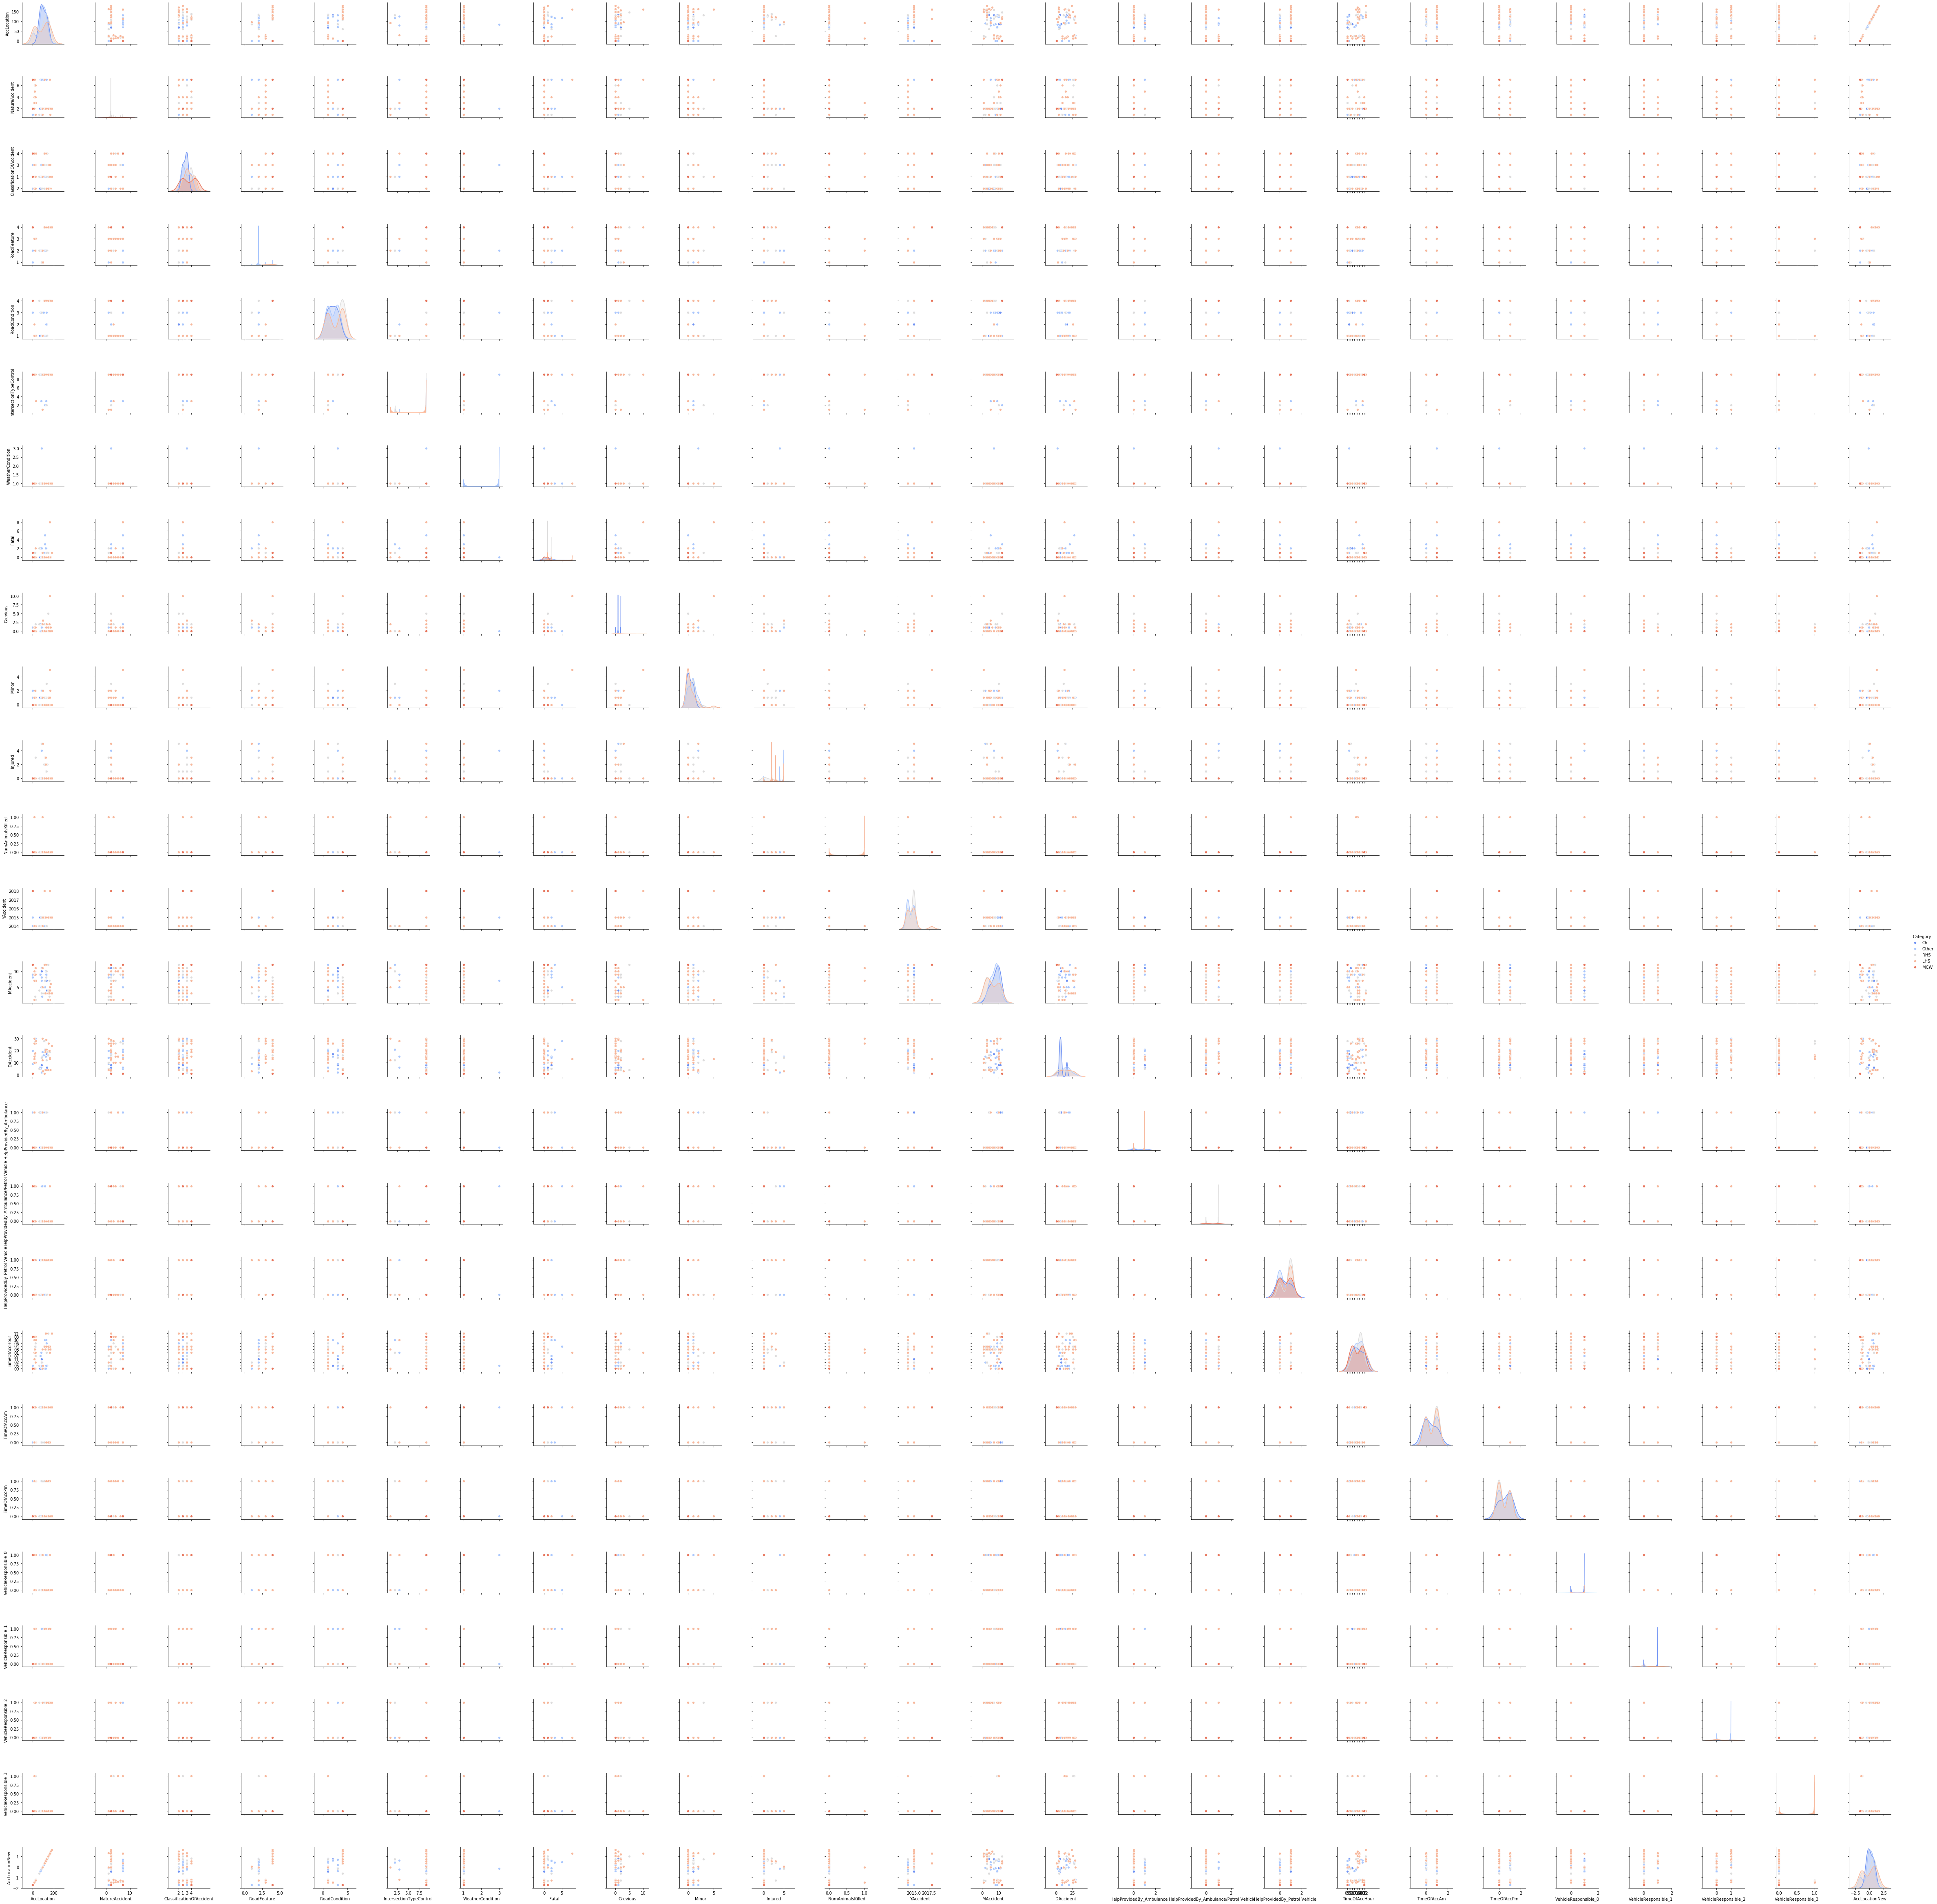

In [118]:
#sns.boxplot(data = dt, x='band', y='offered',order=["E0","E1","E2","E3","E4","E5"])
#sns.countplot(data = dt, x = 'notice')
sns.pairplot(dataAcc_New1,hue='Category',palette='coolwarm')

In [125]:
dataAcc_New2 = dataAcc_New1.copy()
dataAcc_New2 = dataAcc_New2.drop(['Grevious','Minor','RoadFeature','RoadCondition','Remarks','YAccident','MAccident','DAccident','TimeOfAccHour','TimeOfAccAm','TimeOfAccPm','VehicleResponsible_0','VehicleResponsible_1','VehicleResponsible_2','VehicleResponsible_3','Causes','WeatherCondition','NumAnimalsKilled','IntersectionTypeControl','HelpProvidedBy_Ambulance','HelpProvidedBy_Ambulance/Petrol Vehicle','HelpProvidedBy_Petrol Vehicle'],axis = 1)
dataAcc_New2.head()

AccLocation  NatureAccident ClassificationOfAccident  Fatal  Injured  \
0      69.5006               2                        2      0        0   
1      72.5000               7                        1      2        0   
3       0.0000               1                        2      0        0   
4     126.8000               2                        2      0        1   
5     126.8000               2                        3      0        1   

  Category  AccLocationNew  
0       Ch       -0.428606  
1    Other       -0.373363  
3    Other       -1.708654  
4      RHS        0.626723  
5      RHS        0.626723

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


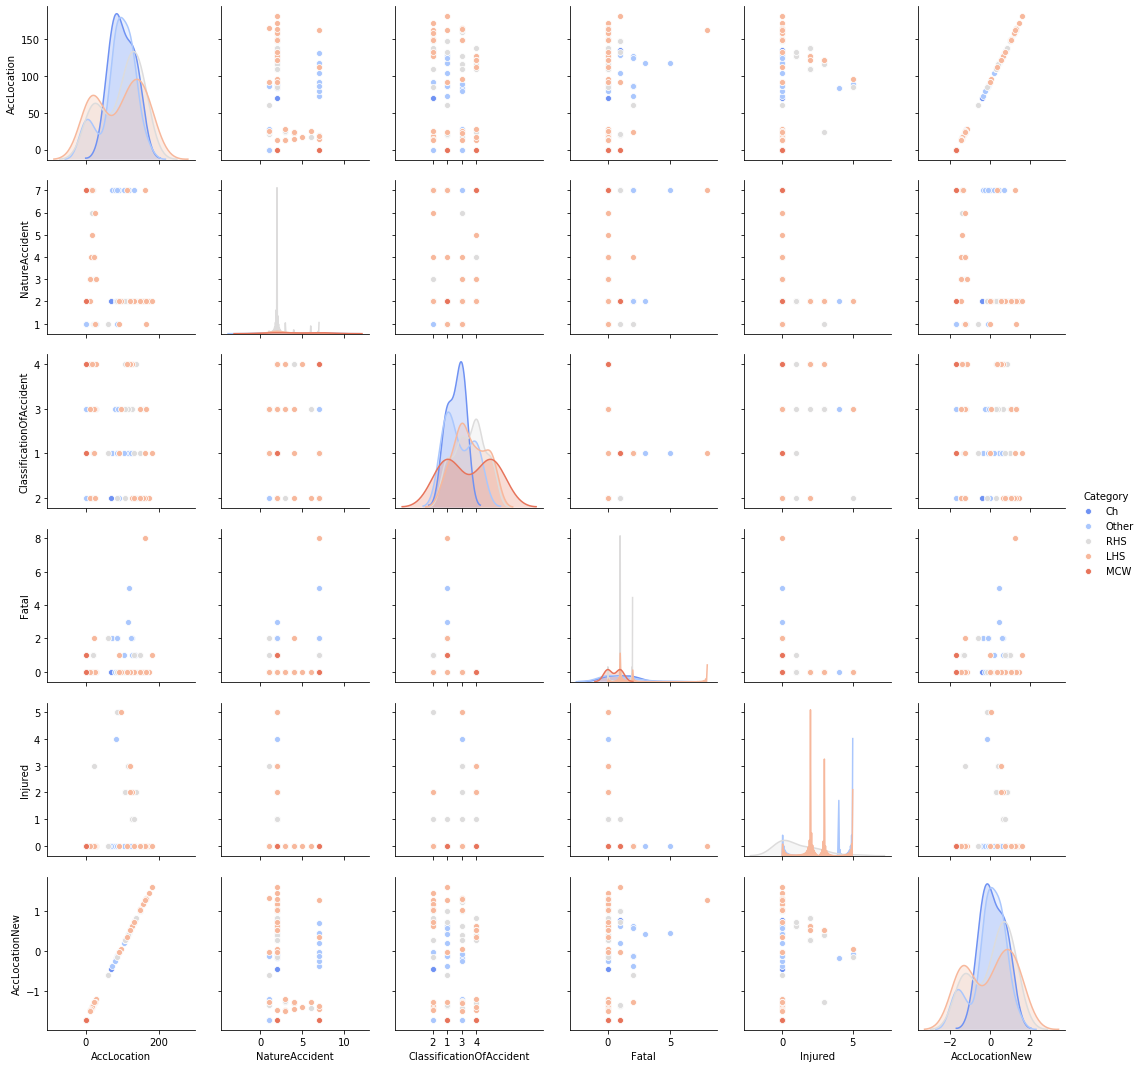

In [126]:
sns.pairplot(dataAcc_New2,hue='Category',palette='coolwarm')

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


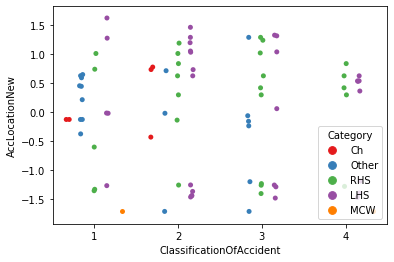

In [127]:
sns.stripplot(x="ClassificationOfAccident", y="AccLocationNew", data=dataAcc_New2,jitter=True,hue='Category',palette='Set1',split=True)

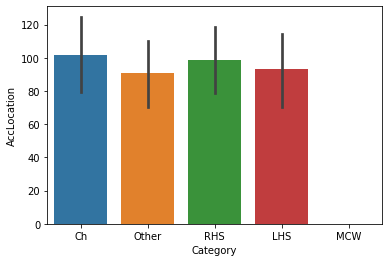

In [129]:
sns.barplot(x='Category',y='AccLocation',data=dataAcc_New2)

In [131]:
dataAcc_New2 = dataAcc_New1.copy()
dataAcc_New2 = dataAcc_New2.drop(['AccLocationNew','Grevious','Minor','RoadFeature','RoadCondition','Remarks','YAccident','MAccident','DAccident','TimeOfAccHour','TimeOfAccAm','TimeOfAccPm','VehicleResponsible_0','VehicleResponsible_1','VehicleResponsible_2','VehicleResponsible_3','Causes','WeatherCondition','NumAnimalsKilled','IntersectionTypeControl','HelpProvidedBy_Ambulance','HelpProvidedBy_Ambulance/Petrol Vehicle','HelpProvidedBy_Petrol Vehicle'],axis = 1)

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


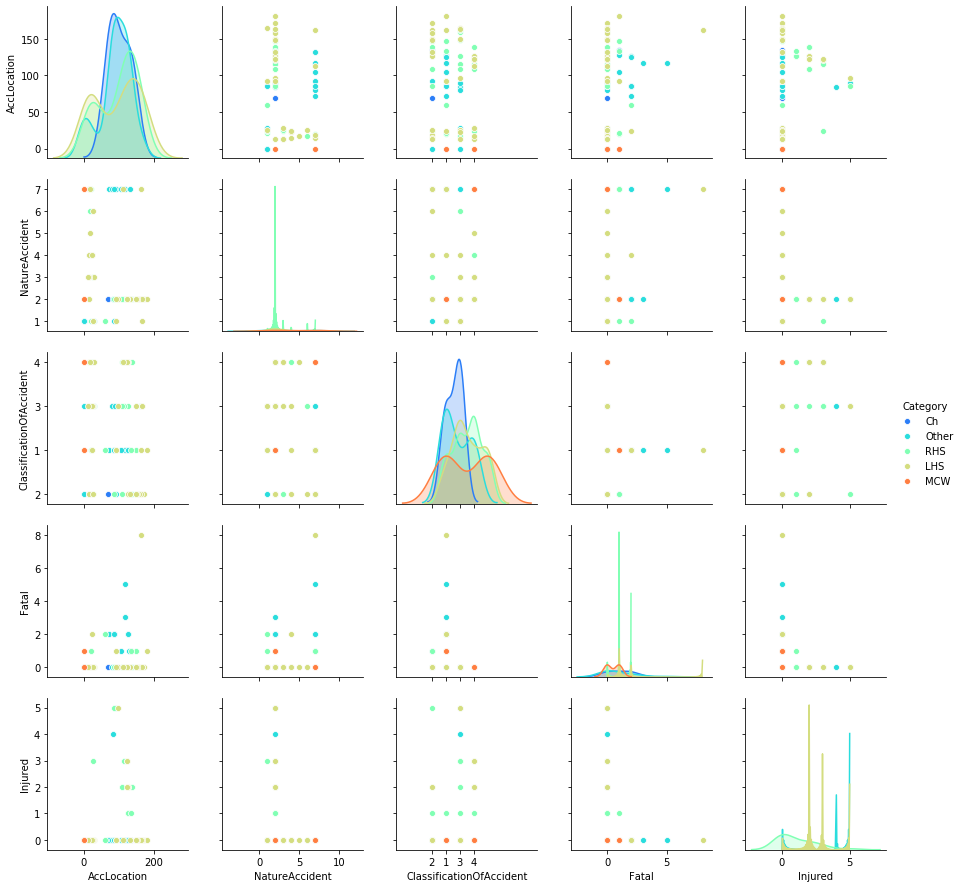

In [132]:
sns.pairplot(dataAcc_New2,hue='Category',palette='rainbow')

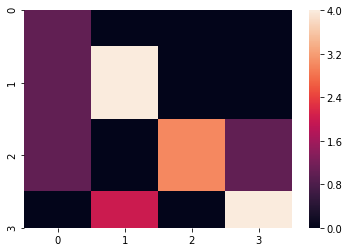

In [113]:
#HeatMap for Correlation matrix
sns.heatmap(metrics.confusion_matrix(y_test, DT_predictions_1))

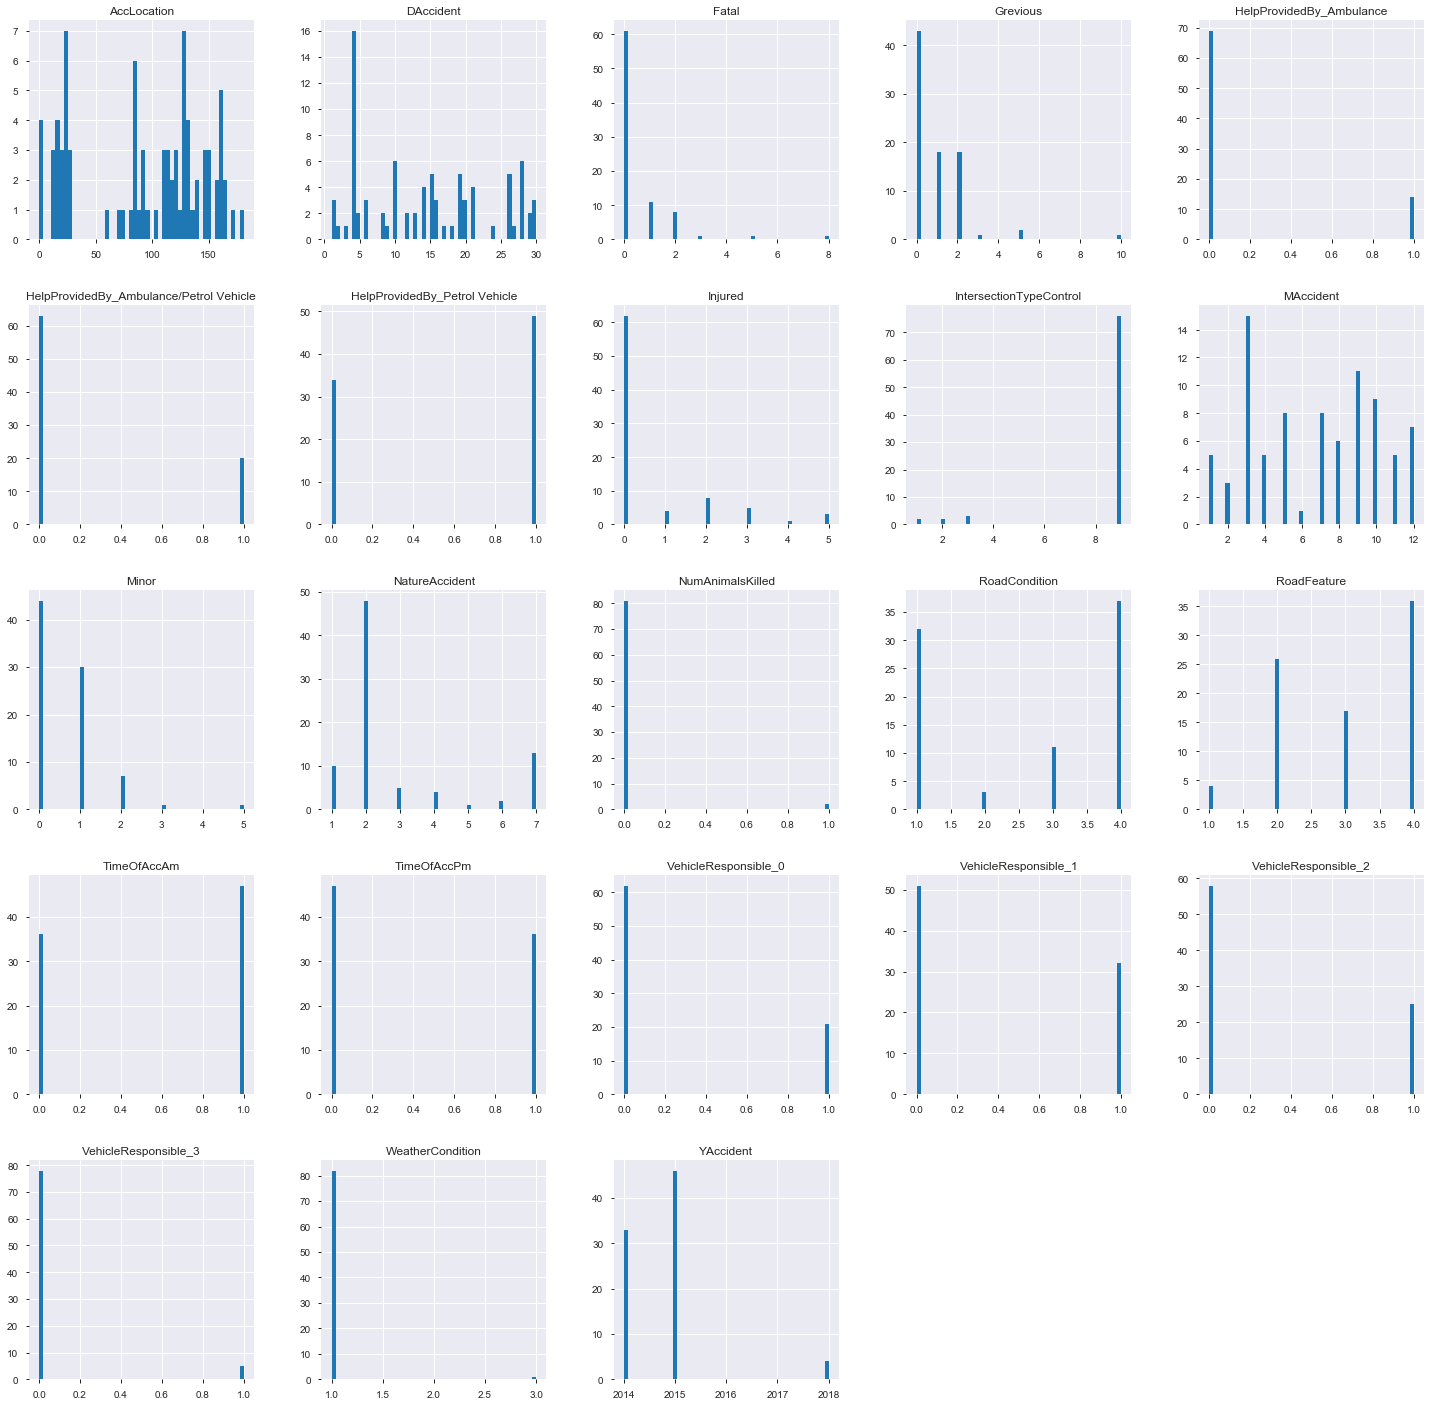

In [144]:
%matplotlib inline 
import matplotlib.pyplot as plt
dataAcc.hist(bins=50, figsize=(25,25))
plt.show()

In [115]:
dataAcc_New.head()

AccLocation  NatureAccident ClassificationOfAccident Causes  RoadFeature  \
0      69.5006               2                        2      2            2   
1      72.5000               7                        1      2            2   
3       0.0000               1                        2      2            1   
4     126.8000               2                        2      2            4   
5     126.8000               2                        3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  HelpProvidedBy_Ambulance/Petrol Vehicle  \
0  ...                                        0   
1  ...                                        0   
3  ...                                        0   
4  ...                                        0   
5  ...                                        0   

   HelpProvidedBy_Petrol Vehicle  TimeOfAccHour TimeOfAccAm  TimeOfAccPm  \
0                              1             09           1            0   
1                              0             07           1            0   
3                              1             05           1            0   
4                              1             08           1            0   
5                              1             08           1            0   

   VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
0                     1                     0                     0   
1                     1                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   
5                     0                     1                     0   

   VehicleResponsible_3  Category  
0                     0        Ch  
1                     0     Other  
3                     0     Other  
4                     0       RHS  
5                     0       RHS  

[5 rows x 28 columns]

<font color=blue, size=150px>

**Q3**
</font>

In [139]:
dataAcc_New2 = pd.DataFrame.from_csv("NHAI_dataAcc_New.csv")

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [140]:
dataAcc_New2.head()

AccLocation  NatureAccident  ClassificationOfAccident Causes  RoadFeature  \
0      69.5006               2                         2      2            2   
1      72.5000               7                         1      2            2   
3       0.0000               1                         2      2            1   
4     126.8000               2                         2      2            4   
5     126.8000               2                         3      2            4   

   RoadCondition  IntersectionTypeControl  WeatherCondition  Fatal  Grevious  \
0              1                        9                 1      0         2   
1              3                        9                 1      2         0   
3              3                        9                 1      0         1   
4              4                        9                 1      0         2   
5              4                        9                 1      0         2   

   ...  HelpProvidedBy_Ambulance/Petrol Vehicle  \
0  ...                                        0   
1  ...                                        0   
3  ...                                        0   
4  ...                                        0   
5  ...                                        0   

   HelpProvidedBy_Petrol Vehicle  TimeOfAccHour TimeOfAccAm  TimeOfAccPm  \
0                              1              9           1            0   
1                              0              7           1            0   
3                              1              5           1            0   
4                              1              8           1            0   
5                              1              8           1            0   

   VehicleResponsible_0  VehicleResponsible_1  VehicleResponsible_2  \
0                     1                     0                     0   
1                     1                     0                     0   
3                     1                     0                     0   
4                     0                     1                     0   
5                     0                     1                     0   

   VehicleResponsible_3  Category  
0                     0        Ch  
1                     0     Other  
3                     0     Other  
4                     0       RHS  
5                     0       RHS  

[5 rows x 28 columns]

In [141]:
import pandas_profiling as pp

In [142]:
pp.ProfileReport(dataAcc_New2)

C:\Users\Admin\Anaconda3\envs\opencvevn\lib\site-packages\pandas_profiling\model\correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 1).')
  correlation_name=correlation_name, error=error


In [189]:
#X = dataAcc_New1.drop(['AccLocation','Remarks','YAccident','MAccident','DAccident','TimeOfAccHour','TimeOfAccAm','TimeOfAccPm','VehicleResponsible_0','VehicleResponsible_1','VehicleResponsible_2','VehicleResponsible_3','Category','Causes','WeatherCondition','NumAnimalsKilled','IntersectionTypeControl','HelpProvidedBy_Ambulance','HelpProvidedBy_Ambulance/Petrol Vehicle','HelpProvidedBy_Petrol Vehicle'],axis = 1)
X1 = dataAcc_New1.drop(['Remarks','ClassificationOfAccident','Category','Causes'],axis = 1)
y1 = dataAcc_New1['ClassificationOfAccident']

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.20, random_state = 101)

In [191]:
X_train.shape

(66, 25)

In [192]:
X_test.shape

(17, 25)

In [193]:
y_train.shape

(66,)

In [194]:
y_test.shape

(17,)

In [195]:
rf_3 = RandomForestClassifier(n_estimators=1000,
        max_depth=10, 
        max_features='auto', 
        bootstrap=True,
        oob_score=True,
        random_state=1)    

In [196]:
rf_3.fit(X_train, y_train)
predicted_y_with_train_data = rf_3.predict(X_train)

In [187]:
def printClassifierPerformance (rf_3, X_train, actualY, predictedY):

    feature_importances = pd.DataFrame(rf_3.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)

    #print the feature importance - tbd
    print ('Feature Importance is ',feature_importances)
                                        
    #print the oob-score (out of box features error score)
    print ('Out of box features score is ',rf_3.oob_score_)
    
    #print the confusion matrix
    c_matrix = confusion_matrix(actualY, predictedY)
    print (c_matrix)
    print ('Accuracy score is',accuracy_score(actualY, predictedY))
    print ('Recall score is', recall_score(actualY, predictedY, average='weighted'))
    print ('Precision store is', precision_score(actualY, predictedY, average='weighted'))
    print ("F1 score is", f1_score(actualY, predictedY, average='weighted'))

    #print the classification report
    print (classification_report(actualY, predictedY))

In [197]:
print ('    ')
print ('********************* Classifier Performance Report On Training Data ***********************')

printClassifierPerformance(rf_3, X_train, y_train, predicted_y_with_train_data)

    
********************* Classifier Performance Report On Training Data ***********************
Feature Importance is                                           importance
Fatal                                      0.193183
Minor                                      0.107789
Grevious                                   0.082684
AccLocation                                0.074084
AccLocationNew                             0.072912
MAccident                                  0.067153
Injured                                    0.060397
DAccident                                  0.053318
TimeOfAccHour                              0.042564
NatureAccident                             0.038355
RoadFeature                                0.037474
RoadCondition                              0.024068
TimeOfAccPm                                0.017716
HelpProvidedBy_Petrol Vehicle              0.017430
HelpProvidedBy_Ambulance                   0.016624
TimeOfAccAm                                0.01

#### Top 5 feature variables of Dataset are: Fatal, Minor, Grevious, AccLocation, MAccident